In [659]:
import pandas as pd
import numpy as np
import plot_likert
import matplotlib as plt
import seaborn as sns
sns.set(rc = {'figure.figsize':(15,8)})

# Setting up

## Language Envirnoment Setup (Configuration)

In [660]:
print(plt.__file__) # 找出套件安裝位置

c:\Users\phili\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\__init__.py


I have installed NotoSansTC-Medium.otf at [Noto Sans Traditional Chinese - Google Fonts](https://fonts.google.com/noto/specimen/Noto+Sans+TC)

In [661]:
import matplotlib.font_manager
 
a = sorted([f.name for f in matplotlib.font_manager.fontManager.ttflist])
 
for i in a:
    print(i)

Agency FB
Agency FB
Algerian
Arial
Arial
Arial
Arial
Arial
Arial
Arial
Arial
Arial
Arial Rounded MT Bold
Bahnschrift
Baskerville Old Face
Bauhaus 93
Bell MT
Bell MT
Bell MT
Berlin Sans FB
Berlin Sans FB
Berlin Sans FB Demi
Bernard MT Condensed
Blackadder ITC
Bodoni MT
Bodoni MT
Bodoni MT
Bodoni MT
Bodoni MT
Bodoni MT
Bodoni MT
Bodoni MT
Bodoni MT
Bodoni MT
Bodoni MT
Book Antiqua
Book Antiqua
Book Antiqua
Book Antiqua
Bookman Old Style
Bookman Old Style
Bookman Old Style
Bookman Old Style
Bookshelf Symbol 7
Bradley Hand ITC
Britannic Bold
Broadway
Brush Script MT
Calibri
Calibri
Calibri
Calibri
Calibri
Calibri
Californian FB
Californian FB
Californian FB
Calisto MT
Calisto MT
Calisto MT
Calisto MT
Cambria
Cambria
Cambria
Cambria
Candara
Candara
Candara
Candara
Candara
Candara
Castellar
Centaur
Century
Century Gothic
Century Gothic
Century Gothic
Century Gothic
Century Schoolbook
Century Schoolbook
Century Schoolbook
Century Schoolbook
Chiller
Colonna MT
Comic Sans MS
Comic Sans MS
Comic

In [662]:
plt.rcParams['font.sans-serif'] = ['Noto Sans TC'] # 要使用中文字型，我們要加入一行指令來告訴matplotlib設定中文字型

# Loading data
[Solving real world data science tasks with Python Pandas! - YouTube](https://www.youtube.com/watch?v=eMOA1pPVUc4)

In [663]:
df = pd.read_csv("./Data souce table_Responses_majors and questions standardized.csv")
df.head()

,Timestamp,Q1. What is your gender?,Q2. What year of the undergraduate programme are you in?,"Q3. Is teaching/training in artificial intelligence (i.e., a 1-, 2-, or 3-credits course on AI) a compulsory part of your undergraduate curriculum?",Q4. I understand what the term “artificial intelligence” means.,Q5. I understand what the term “machine learning” (機器學習) means.,Q6. AI will reduce the number of jobs available to me.,Q7. AI will reduce the number of certain types of jobs more than other types.,Q8. AI will do the repetitive tasks for me in my jobs.,"Q9. By using AI, I will be able to focus more on creative work.",...,"Q11. Learning about AI basics, namely, the above-mentioned course(s), will be beneficial for my career.",Q12. A 2-credits AI basics course should be in my undergraduate curriculum.,Q13. Please rate your likelihood of attending the following optional activities in extracurricular (i.e. outside of curriculum) time: [A 2-hour face-to-face AI basics workshop held by my university],Q14. Please rate your likelihood of attending the following optional activities in extracurricular (i.e. outside of curriculum) time: [A 7-hour face-to-face multiple workshop series (each workshop is held on different days) on AI basics arranged by my university],"Q15. After my graduation, I will be required to work with basic AI tools (such as AI software) in some parts of my job.",Q16. I am confident in using basic AI tools if required.,Q17. I am certain about how AI would be applicable to the fields/industries I want to work in.,Q18. I understand what the term “algorithm” (演算法) means in computer science (電腦科學).,Q19. AI will/already did impact my career decision.,Q20. Which academic discipline (學科) is most related to the major programme (主修課程) you enrolled in?
0,8/3/2022 1:02,Male,5th,No,Agree,Neutral,Agree,Strongly agree,Strongly agree,Strongly agree,...,Neutral,Strongly disagree,Uncertain,Unlikely,Strongly agree,Strongly agree,Agree,Agree,Strongly agree,Engineering & Technology
1,8/3/2022 1:44,Female,4th year,No,Neutral,Neutral,Agree,Strongly agree,Strongly agree,Neutral,...,Agree,Neutral,Uncertain,Extremely unlikely,Agree,Neutral,Neutral,Strongly disagree,Neutral,Business & Management
2,8/3/2022 3:03,Female,2nd year,No,Neutral,Neutral,Agree,Agree,Agree,Neutral,...,Agree,Agree,Uncertain,Uncertain,Neutral,Neutral,Neutral,Disagree,Neutral,"Medicine, Dentistry & Health"
3,8/3/2022 13:01,Female,4th year,No,Agree,Neutral,Agree,Agree,Agree,Agree,...,Agree,Neutral,Unlikely,Unlikely,Neutral,Disagree,Neutral,Disagree,Neutral,Arts & Humanities
4,8/3/2022 13:06,Female,1st year,No,Agree,Agree,Agree,Agree,Agree,Neutral,...,Neutral,Disagree,Likely,Uncertain,Neutral,Agree,Neutral,Agree,Neutral,Social Sciences


In [664]:
df.columns

Index(['Timestamp', 'Q1. What is your gender?',
       'Q2. What year of the undergraduate programme are you in?',
       'Q3. Is teaching/training in artificial intelligence (i.e., a 1-, 2-, or 3-credits course on AI) a compulsory part of your undergraduate curriculum?',
       'Q4. I understand what the term “artificial intelligence” means.',
       'Q5. I understand what the term “machine learning” (機器學習) means.',
       'Q6. AI will reduce the number of jobs available to me.',
       'Q7. AI will reduce the number of certain types of jobs more than other types.',
       'Q8. AI will do the repetitive tasks for me in my jobs.',
       'Q9. By using AI, I will be able to focus more on creative work.',
       'Q10. Overall, the development of AI will be beneficial for my career.',
       'Q11. Learning about AI basics, namely, the above-mentioned course(s), will be beneficial for my career.',
       'Q12. A 2-credits AI basics course should be in my undergraduate curriculum.',
       

# Cleaning Data

In [665]:
searchfor = ['1st year', '2nd year', '3rd year', '4th year'] # [python - How to test if a string contains one of the substrings in a list, in pandas? - Stack Overflow](https://stackoverflow.com/questions/26577516/how-to-test-if-a-string-contains-one-of-the-substrings-in-a-list-in-pandas)
df_undefined_reponse = df[~df["Q2. What year of the undergraduate programme are you in?"].str.contains('|'.join(searchfor))] # [python - Search for "does-not-contain" on a DataFrame in pandas - Stack Overflow](https://stackoverflow.com/questions/17097643/search-for-does-not-contain-on-a-dataframe-in-pandas)
df_undefined_reponse

,Timestamp,Q1. What is your gender?,Q2. What year of the undergraduate programme are you in?,"Q3. Is teaching/training in artificial intelligence (i.e., a 1-, 2-, or 3-credits course on AI) a compulsory part of your undergraduate curriculum?",Q4. I understand what the term “artificial intelligence” means.,Q5. I understand what the term “machine learning” (機器學習) means.,Q6. AI will reduce the number of jobs available to me.,Q7. AI will reduce the number of certain types of jobs more than other types.,Q8. AI will do the repetitive tasks for me in my jobs.,"Q9. By using AI, I will be able to focus more on creative work.",...,"Q11. Learning about AI basics, namely, the above-mentioned course(s), will be beneficial for my career.",Q12. A 2-credits AI basics course should be in my undergraduate curriculum.,Q13. Please rate your likelihood of attending the following optional activities in extracurricular (i.e. outside of curriculum) time: [A 2-hour face-to-face AI basics workshop held by my university],Q14. Please rate your likelihood of attending the following optional activities in extracurricular (i.e. outside of curriculum) time: [A 7-hour face-to-face multiple workshop series (each workshop is held on different days) on AI basics arranged by my university],"Q15. After my graduation, I will be required to work with basic AI tools (such as AI software) in some parts of my job.",Q16. I am confident in using basic AI tools if required.,Q17. I am certain about how AI would be applicable to the fields/industries I want to work in.,Q18. I understand what the term “algorithm” (演算法) means in computer science (電腦科學).,Q19. AI will/already did impact my career decision.,Q20. Which academic discipline (學科) is most related to the major programme (主修課程) you enrolled in?
0,8/3/2022 1:02,Male,5th,No,Agree,Neutral,Agree,Strongly agree,Strongly agree,Strongly agree,...,Neutral,Strongly disagree,Uncertain,Unlikely,Strongly agree,Strongly agree,Agree,Agree,Strongly agree,Engineering & Technology
115,9/20/2022 14:11:21,Female,5th year,No,Neutral,Neutral,Agree,Agree,Strongly agree,Agree,...,Neutral,Disagree,Uncertain,Extremely unlikely,Disagree,Disagree,Disagree,Disagree,Disagree,"Medicine, Dentistry & Health"


In [666]:
targeted_row = [0, 115]
df.loc[targeted_row, "Q2. What year of the undergraduate programme are you in?"] = "5th year"
df.loc[targeted_row]

,Timestamp,Q1. What is your gender?,Q2. What year of the undergraduate programme are you in?,"Q3. Is teaching/training in artificial intelligence (i.e., a 1-, 2-, or 3-credits course on AI) a compulsory part of your undergraduate curriculum?",Q4. I understand what the term “artificial intelligence” means.,Q5. I understand what the term “machine learning” (機器學習) means.,Q6. AI will reduce the number of jobs available to me.,Q7. AI will reduce the number of certain types of jobs more than other types.,Q8. AI will do the repetitive tasks for me in my jobs.,"Q9. By using AI, I will be able to focus more on creative work.",...,"Q11. Learning about AI basics, namely, the above-mentioned course(s), will be beneficial for my career.",Q12. A 2-credits AI basics course should be in my undergraduate curriculum.,Q13. Please rate your likelihood of attending the following optional activities in extracurricular (i.e. outside of curriculum) time: [A 2-hour face-to-face AI basics workshop held by my university],Q14. Please rate your likelihood of attending the following optional activities in extracurricular (i.e. outside of curriculum) time: [A 7-hour face-to-face multiple workshop series (each workshop is held on different days) on AI basics arranged by my university],"Q15. After my graduation, I will be required to work with basic AI tools (such as AI software) in some parts of my job.",Q16. I am confident in using basic AI tools if required.,Q17. I am certain about how AI would be applicable to the fields/industries I want to work in.,Q18. I understand what the term “algorithm” (演算法) means in computer science (電腦科學).,Q19. AI will/already did impact my career decision.,Q20. Which academic discipline (學科) is most related to the major programme (主修課程) you enrolled in?
0,8/3/2022 1:02,Male,5th year,No,Agree,Neutral,Agree,Strongly agree,Strongly agree,Strongly agree,...,Neutral,Strongly disagree,Uncertain,Unlikely,Strongly agree,Strongly agree,Agree,Agree,Strongly agree,Engineering & Technology
115,9/20/2022 14:11:21,Female,5th year,No,Neutral,Neutral,Agree,Agree,Strongly agree,Agree,...,Neutral,Disagree,Uncertain,Extremely unlikely,Disagree,Disagree,Disagree,Disagree,Disagree,"Medicine, Dentistry & Health"


In [667]:
# replace by dictionary
df_aggregated = df.replace({'Strongly agree': 'Agree', 'Strongly disagree': 'Disagree', 'Extremely unlikely': 'Unlikely', 'Extremely likely': 'Likely'})
df_aggregated.head()

,Timestamp,Q1. What is your gender?,Q2. What year of the undergraduate programme are you in?,"Q3. Is teaching/training in artificial intelligence (i.e., a 1-, 2-, or 3-credits course on AI) a compulsory part of your undergraduate curriculum?",Q4. I understand what the term “artificial intelligence” means.,Q5. I understand what the term “machine learning” (機器學習) means.,Q6. AI will reduce the number of jobs available to me.,Q7. AI will reduce the number of certain types of jobs more than other types.,Q8. AI will do the repetitive tasks for me in my jobs.,"Q9. By using AI, I will be able to focus more on creative work.",...,"Q11. Learning about AI basics, namely, the above-mentioned course(s), will be beneficial for my career.",Q12. A 2-credits AI basics course should be in my undergraduate curriculum.,Q13. Please rate your likelihood of attending the following optional activities in extracurricular (i.e. outside of curriculum) time: [A 2-hour face-to-face AI basics workshop held by my university],Q14. Please rate your likelihood of attending the following optional activities in extracurricular (i.e. outside of curriculum) time: [A 7-hour face-to-face multiple workshop series (each workshop is held on different days) on AI basics arranged by my university],"Q15. After my graduation, I will be required to work with basic AI tools (such as AI software) in some parts of my job.",Q16. I am confident in using basic AI tools if required.,Q17. I am certain about how AI would be applicable to the fields/industries I want to work in.,Q18. I understand what the term “algorithm” (演算法) means in computer science (電腦科學).,Q19. AI will/already did impact my career decision.,Q20. Which academic discipline (學科) is most related to the major programme (主修課程) you enrolled in?
0,8/3/2022 1:02,Male,5th year,No,Agree,Neutral,Agree,Agree,Agree,Agree,...,Neutral,Disagree,Uncertain,Unlikely,Agree,Agree,Agree,Agree,Agree,Engineering & Technology
1,8/3/2022 1:44,Female,4th year,No,Neutral,Neutral,Agree,Agree,Agree,Neutral,...,Agree,Neutral,Uncertain,Unlikely,Agree,Neutral,Neutral,Disagree,Neutral,Business & Management
2,8/3/2022 3:03,Female,2nd year,No,Neutral,Neutral,Agree,Agree,Agree,Neutral,...,Agree,Agree,Uncertain,Uncertain,Neutral,Neutral,Neutral,Disagree,Neutral,"Medicine, Dentistry & Health"
3,8/3/2022 13:01,Female,4th year,No,Agree,Neutral,Agree,Agree,Agree,Agree,...,Agree,Neutral,Unlikely,Unlikely,Neutral,Disagree,Neutral,Disagree,Neutral,Arts & Humanities
4,8/3/2022 13:06,Female,1st year,No,Agree,Agree,Agree,Agree,Agree,Neutral,...,Neutral,Disagree,Likely,Uncertain,Neutral,Agree,Neutral,Agree,Neutral,Social Sciences


In [668]:
df_aggregated["Q4. I understand what the term “artificial intelligence” means."].str.contains("Strongly agree")

0      False
1      False
2      False
3      False
4      False
       ...  
116    False
117    False
118    False
119    False
120    False
Name: Q4. I understand what the term “artificial intelligence” means., Length: 121, dtype: bool

In [669]:
df_aggregated["Q4. I understand what the term “artificial intelligence” means."].str.contains("Agree")

0       True
1      False
2      False
3       True
4       True
       ...  
116    False
117     True
118     True
119     True
120    False
Name: Q4. I understand what the term “artificial intelligence” means., Length: 121, dtype: bool

# Putting survey questions to their respective sessions
[Analyze Survey Data with Python for Beginners | Pandas - YouTube](https://www.youtube.com/watch?v=B-lliwc0ZMk&t=248s)

## Demographic Information

In [670]:
demographic = ['Q1. What is your gender?', 
    'Q2. What year of the undergraduate programme are you in?',
    'Q3. Is teaching/training in artificial intelligence (i.e., a 1-, 2-, or 3-credits course on AI) a compulsory part of your undergraduate curriculum?',
    'Q20. Which academic discipline (學科) is most related to the major programme (主修課程) you enrolled in?'] # Past/future exposure to AI

## I. Knowledge of AI

In [671]:
AI_knowledge = ['Q4. I understand what the term “artificial intelligence” means.',
    'Q5. I understand what the term “machine learning” (機器學習) means.',
    'Q18. I understand what the term “algorithm” (演算法) means in computer science (電腦科學).']

## II. View on the Impact of AI on Jobs

From AI_impact_prospects to AI_impact_nature_of_work to AI_impact_tools, we are geting more and more specific.
- Those type of questions designed in such manner so that we can capture students' perpectives in different level of granularity

In [711]:
AI_impact = [
       'Q6. AI will reduce the number of jobs available to me.',
       'Q7. AI will reduce the number of certain types of jobs more than other types.',
       'Q8. AI will do the repetitive tasks for me in my jobs.',
       'Q9. By using AI, I will be able to focus more on creative work.',
       'Q10. Overall, the development of AI will be beneficial for my career.',
       'Q15. After my graduation, I will be required to work with basic AI tools (such as AI software)  in some parts of my job.',
       'Q16. I am confident in using basic AI tools if required.',
       'Q17. I am certain about how AI would be applicable to the fields/industries I want to work in.',
       'Q19. AI will/already did impact my career decision.']
# Theme: perceived career prospects about jobs opportunities
AI_impact_prospects = [
       'Q6. AI will reduce the number of jobs available to me.', # On a personal level, perceived career prospects
       'Q7. AI will reduce the number of certain types of jobs more than other types.', # On a societal level, perceived career prospects
       'Q10. Overall, the development of AI will be beneficial for my career.'] # Positve view On a personal level vs. negative view (the negative is what Q6, Q7 measured)
# Theme: perceived nature of work, or the day-to-day work (Remember that? The task-based approach study)
AI_impact_nature_of_work = [
       'Q8. AI will do the repetitive tasks for me in my jobs.',
       'Q9. By using AI, I will be able to focus more on creative work.'] # Contrasting: repetitive <-> creative
AI_impact_tools = [
       'Q15. After my graduation, I will be required to work with basic AI tools (such as AI software)  in some parts of my job.', # Theme: perceived impact of AI tools on jobs on a personal level
       'Q16. I am confident in using basic AI tools if required.', # Attitude: competencies of AI (perceived competencies), AI tools is the proxy here
       'Q17. I am certain about how AI would be applicable to the fields/industries I want to work in.'] # Attitude: certainty; Theme: perceived impact of AI tools on jobs on a industrial level (that relavent to them)
AI_impact_decision = ['Q19. AI will/already did impact my career decision.'] # Theme: perceived impact on personal career decision

## III. Views on Undergraduate AI Education

In [673]:
AI_edu = ['Q11. Learning about AI basics, namely, the above-mentioned course(s), will be beneficial for my career.',
    'Q12. A 2-credits AI basics course should be in my undergraduate curriculum.',
    'Q13. Please rate your likelihood of attending the following optional activities in extracurricular (i.e. outside of curriculum) time: [A 2-hour face-to-face AI basics workshop held by my university]',
    'Q14. Please rate your likelihood of attending the following optional activities in extracurricular (i.e. outside of curriculum) time: [A 7-hour face-to-face multiple workshop series (each workshop is held on different days) on AI basics arranged by my university]']
AI_edu_necessity = ['Q11. Learning about AI basics, namely, the above-mentioned course(s), will be beneficial for my career.',
    'Q12. A 2-credits AI basics course should be in my undergraduate curriculum.']
AI_edu_format = ['Q13. Please rate your likelihood of attending the following optional activities in extracurricular (i.e. outside of curriculum) time: [A 2-hour face-to-face AI basics workshop held by my university]',
    'Q14. Please rate your likelihood of attending the following optional activities in extracurricular (i.e. outside of curriculum) time: [A 7-hour face-to-face multiple workshop series (each workshop is held on different days) on AI basics arranged by my university]']

## Verification
Total number of questions: 20 
- Number of Demographic Information questions: 4 
- Number of Five-points Likert Scale questions: 3 + 9 + 4 = 16, Where:  
    - 3 are for assessing Knowledge of Artificial Intelligence; 
    - 9 are for collecting Views on The Impact of Artificial Intelligence on Jobs; 
    - 4 are for Views on Undergraduate AI Education. 

In [674]:
# return the number of elements in the list
display(len(demographic))
display(len(AI_knowledge))
display(len(AI_impact))
display(len(AI_edu))

4

3

9

4

# Functions used
- Setting up advanced bar chart
    * Using [nmalkin/plot-likert: Python library to visualize results from Likert scale survey questions](https://github.com/nmalkin/plot-likert)
        * found from [pandas - Adding percentages to subgroups of each group likert-scale Python - Stack Overflow](https://stackoverflow.com/questions/70975856/adding-percentages-to-subgroups-of-each-group-likert-scale-python)
        * [User guide](https://github.com/nmalkin/plot-likert/blob/stable/docs/guide.ipynb)

# Cross analysis by demographic variables

## Finding solution

[python - pandas pivot table to stacked bar chart - Stack Overflow](https://stackoverflow.com/questions/48799718/pandas-pivot-table-to-stacked-bar-chart)

<AxesSubplot: ylabel='Q11. Learning about AI basics, namely, the above-mentioned course(s), will be beneficial for my career.'>

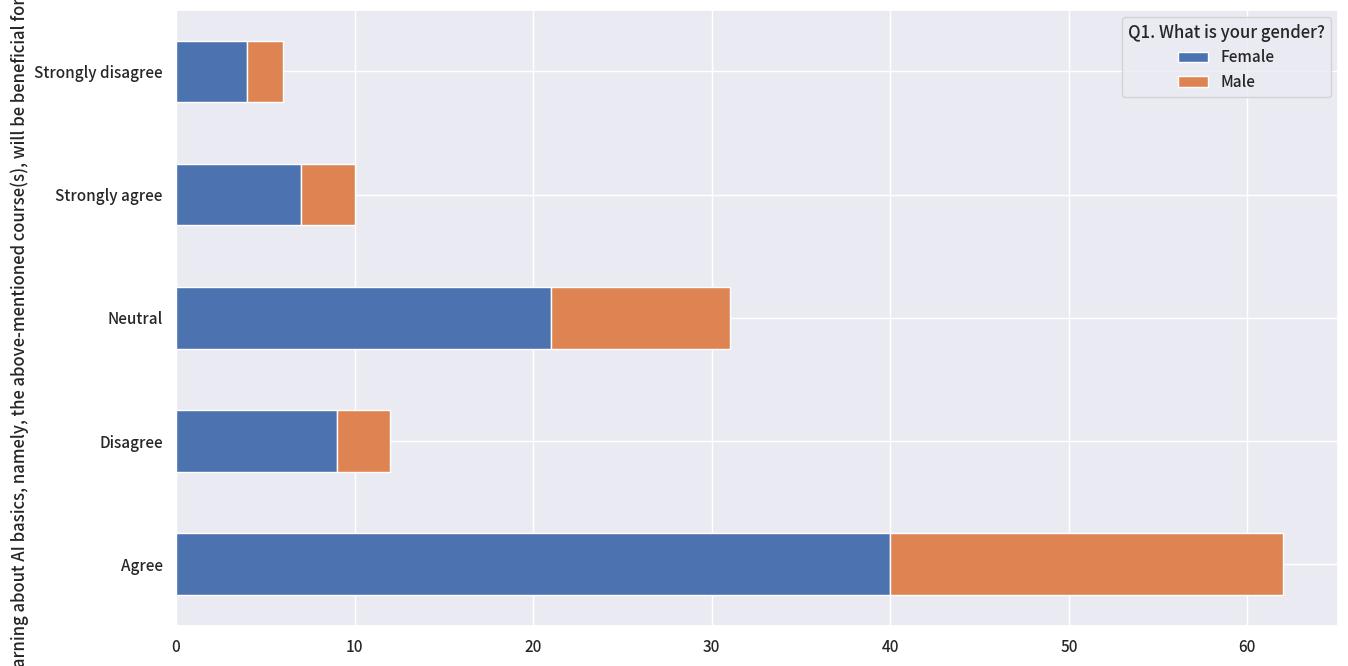

In [675]:
df.pivot_table(index='Q11. Learning about AI basics, namely, the above-mentioned course(s), will be beneficial for my career.', columns='Q1. What is your gender?', aggfunc='size').plot.barh(stacked=True)

[python 3.x - Find Percentage of Male and Female - Stack Overflow](https://stackoverflow.com/questions/61184992/find-percentage-of-male-and-female)

In [676]:
df['Q12. A 2-credits AI basics course should be in my undergraduate curriculum.'].value_counts(normalize=True)

Agree                0.338843
Neutral              0.305785
Disagree             0.198347
Strongly disagree    0.099174
Strongly agree       0.057851
Name: Q12. A 2-credits AI basics course should be in my undergraduate curriculum., dtype: float64

In [677]:
df_by_gender = df.groupby('Q12. A 2-credits AI basics course should be in my undergraduate curriculum.')['Q1. What is your gender?'].value_counts()
df_by_gender

Q12. A 2-credits AI basics course should be in my undergraduate curriculum.  Q1. What is your gender?
Agree                                                                        Female                      25
                                                                             Male                        16
Disagree                                                                     Female                      18
                                                                             Male                         6
Neutral                                                                      Female                      25
                                                                             Male                        12
Strongly agree                                                               Female                       4
                                                                             Male                         3
Strongly disagree                 

<AxesSubplot: xlabel='Q12. A 2-credits AI basics course should be in my undergraduate curriculum.,Q1. What is your gender?'>

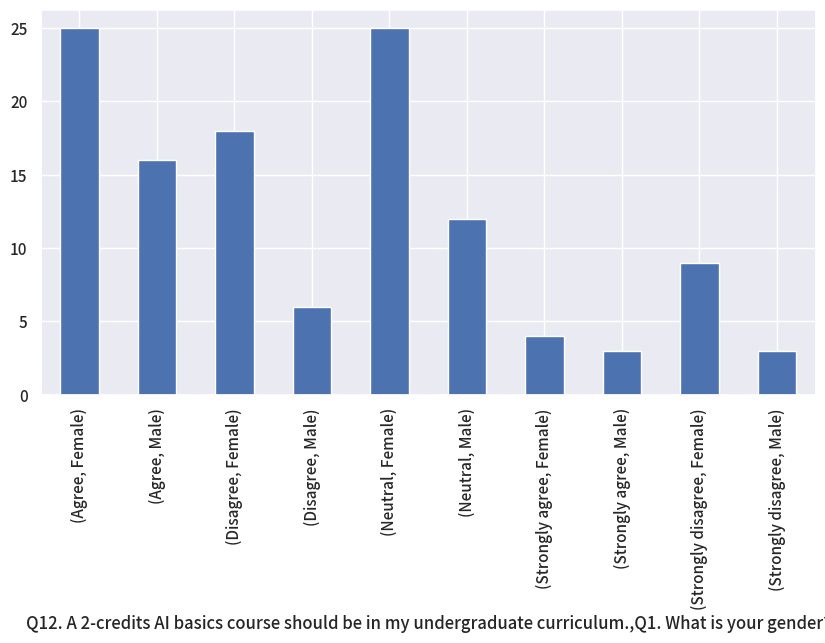

In [678]:
df_by_gender.plot(kind='bar', figsize=(10, 5))

In [679]:
# g = (df[x]
#  .groupby(df[hue])
#  .value_counts(normalize=True)
#  .rename(y)
#  .reset_index()
#  .pipe((sns.barplot, "data"), x=x, y=y, hue=hue))
# g.set_ylim(0,1)
# for p in g.patches:
#     txt = str(p.get_height().round(3))# + '%'
#     txt_x = p.get_x()
#     txt_y = p.get_height()
#     g.text(txt_x,txt_y,txt)

In [680]:
# x, y, hue = "Q12. A 2-credits AI basics course should be in my undergraduate curriculum.", "Proportion", "Q1. What is your gender?"

# df_percent = df[x].groupby(df[hue])
# df_percent
# df_percent = df_percent.value_counts(normalize=True)
# df_percent

In [681]:
# df_percent = df_percent.value_counts(normalize=True)
# df_percent

In [682]:
# df_percent = df_percent.rename(y)
# df_percent = df_percent.reset_index()
# df_percent

In [683]:
# # Multipy the column "Proportion" in df_percent by 100
# df_percent['Proportion'] = df_percent['Proportion'].apply(lambda x: x*100)
# df_percent

## Working solution for cross analysis

In [684]:
# x, y, hue = "Q12. A 2-credits AI basics course should be in my undergraduate curriculum.", "Proportion", "Q1. What is your gender?"
# hue_order = ["Male", "Female"]

# y_axis_order = ["Strongly agree", "Agree", "Neutral", "Disagree", "Strongly disagree"]
# y_axis_order_aggregated = ["Disagree", "Neutral", "Agree"]
# df_middle = df_aggregated[x].groupby(df[hue]).value_counts(normalize=True).rename(y).reset_index()
# df_middle
# df_middle['Proportion'] = df_middle['Proportion'].apply(lambda x: x*100)
# df_middle
# g = (df_middle.pipe((sns.barplot, "data"), x=x, y=y, hue=hue, order = y_axis_order_aggregated))
# g.set_ylim(0,100)
# for p in g.patches:
#     txt = str(p.get_height().round(1)) + '%'
#     txt_x = p.get_x()
#     txt_y = p.get_height()
#     g.text(txt_x,txt_y,txt)

# Make a function for the above code
def plot_cross_analysis(x, hue, is_aggregated): # x for Liker-scale item, hue for demographic variable
    y = "Percentage"
    if (hue == 'Q1. What is your gender?'):
        hue_order = ["Male", "Female"]
    y_axis_order = ["Strongly agree", "Agree", "Neutral", "Disagree", "Strongly disagree"]
    y_axis_order_aggregated = ["Disagree", "Neutral", "Agree"]
    df_middle = df_aggregated[x].groupby(df[hue]).value_counts(normalize=True).rename(y).reset_index()
    display(df_middle)
    df_middle["Percentage"] = df_middle["Percentage"].apply(lambda x: x*100)
    if is_aggregated:
        g = (df_middle.pipe((sns.barplot, "data"), x=x, y=y, hue=hue, order = y_axis_order_aggregated))
    else:
        g = (df_middle.pipe((sns.barplot, "data"), x=x, y=y, hue=hue, order = y_axis_order))
    g.set_ylim(0,100)
    for p in g.patches:
        txt = str(p.get_height().round(1)) + '%'
        txt_x = p.get_x()
        txt_y = p.get_height()
        g.text(txt_x,txt_y,txt)
def plot_cross_analysis_customized(x, hue, hue_order, is_aggregated): # x for Liker-scale item, hue for demographic variable
    y = "Percentage"
    y_axis_order = ["Strongly agree", "Agree", "Neutral", "Disagree", "Strongly disagree"]
    y_axis_order_aggregated = ["Disagree", "Neutral", "Agree"]
    df_middle = df_aggregated[x].groupby(df[hue]).value_counts(normalize=True).rename(y).reset_index()
    display(df_middle)
    df_middle["Percentage"] = df_middle["Percentage"].apply(lambda x: x*100)
    if is_aggregated:
        g = (df_middle.pipe((sns.barplot, "data"), x=x, y=y, hue=hue, order = y_axis_order_aggregated))
    else:
        g = (df_middle.pipe((sns.barplot, "data"), x=x, y=y, hue=hue, order = y_axis_order))
    g.set_ylim(0,100)
    for p in g.patches:
        txt = str(p.get_height().round(1)) + '%'
        txt_x = p.get_x()
        txt_y = p.get_height()
        g.text(txt_x,txt_y,txt)

,Q2. What year of the undergraduate programme are you in?,Q12. A 2-credits AI basics course should be in my undergraduate curriculum.,Percentage
0,1st year,Agree,0.454545
1,1st year,Disagree,0.272727
2,1st year,Neutral,0.272727
3,2nd year,Neutral,0.562500
4,2nd year,Agree,0.250000
5,2nd year,Disagree,0.187500
6,3rd year,Agree,0.478261
7,3rd year,Disagree,0.304348
8,3rd year,Neutral,0.217391
9,4th year,Agree,0.382979


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


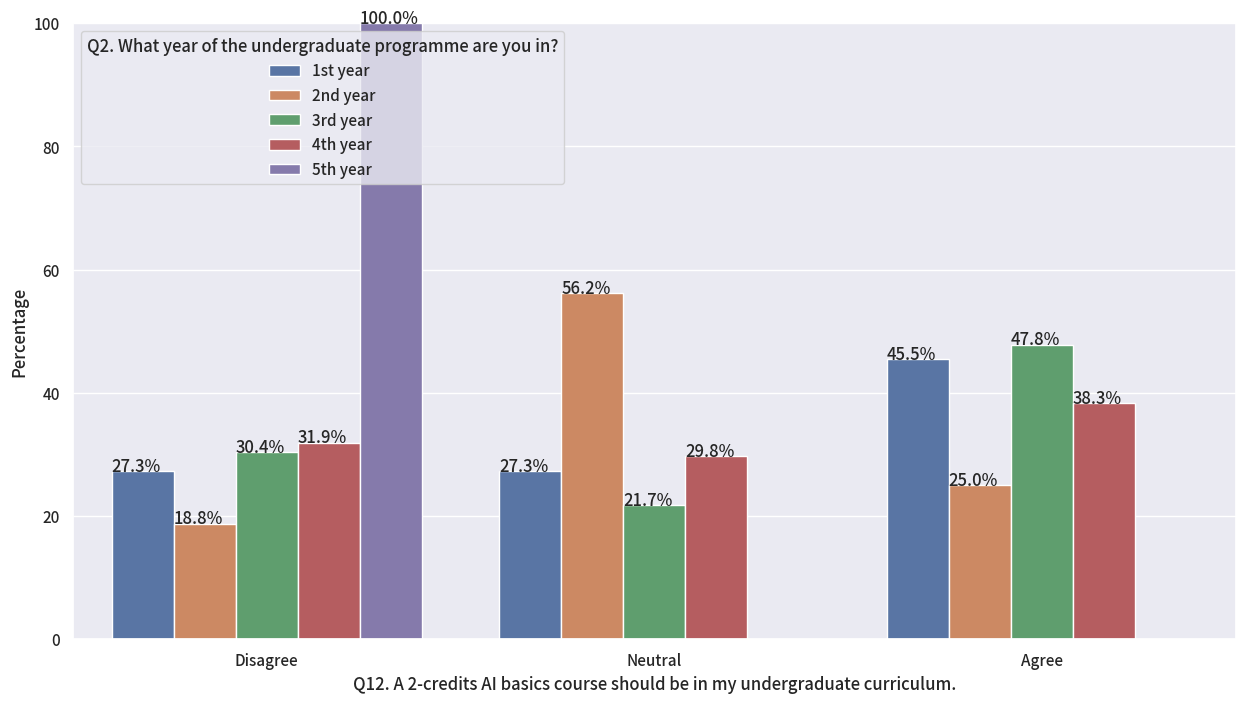

In [685]:
plot_cross_analysis_customized("Q12. A 2-credits AI basics course should be in my undergraduate curriculum.", "Q2. What year of the undergraduate programme are you in?", ['1st year', '2nd year', '3rd year', '4th year', '5th year'], True)

- Because 2 out of 2 student chose broad "Disagree", its corresponding bar display 100% of "Disagree".
- Also note that I will not show this chart in any presentation or report. Because this kind of simple bar chart can only handle 2 bar in each column (e.g. "Disagree" column).
    - see a example: ![](../bar%20chart.png)

In [686]:
x, y = "Q1. What is your gender?", "Q12. A 2-credits AI basics course should be in my undergraduate curriculum."
df_1 = df.groupby(x)[y].value_counts(normalize=True)
df_1

Q1. What is your gender?  Q12. A 2-credits AI basics course should be in my undergraduate curriculum.
Female                    Agree                                                                          0.308642
                          Neutral                                                                        0.308642
                          Disagree                                                                       0.222222
                          Strongly disagree                                                              0.111111
                          Strongly agree                                                                 0.049383
Male                      Agree                                                                          0.400000
                          Neutral                                                                        0.300000
                          Disagree                                                                  

In [687]:
df_1 = df_1.mul(100)
df_1

Q1. What is your gender?  Q12. A 2-credits AI basics course should be in my undergraduate curriculum.
Female                    Agree                                                                          30.864198
                          Neutral                                                                        30.864198
                          Disagree                                                                       22.222222
                          Strongly disagree                                                              11.111111
                          Strongly agree                                                                  4.938272
Male                      Agree                                                                          40.000000
                          Neutral                                                                        30.000000
                          Disagree                                                           

In [688]:
df_1 = df_1.rename('percent').reset_index()
df_1

,Q1. What is your gender?,Q12. A 2-credits AI basics course should be in my undergraduate curriculum.,percent
0,Female,Agree,30.864198
1,Female,Neutral,30.864198
2,Female,Disagree,22.222222
3,Female,Strongly disagree,11.111111
4,Female,Strongly agree,4.938272
5,Male,Agree,40.000000
6,Male,Neutral,30.000000
7,Male,Disagree,15.000000
8,Male,Strongly agree,7.500000
9,Male,Strongly disagree,7.500000


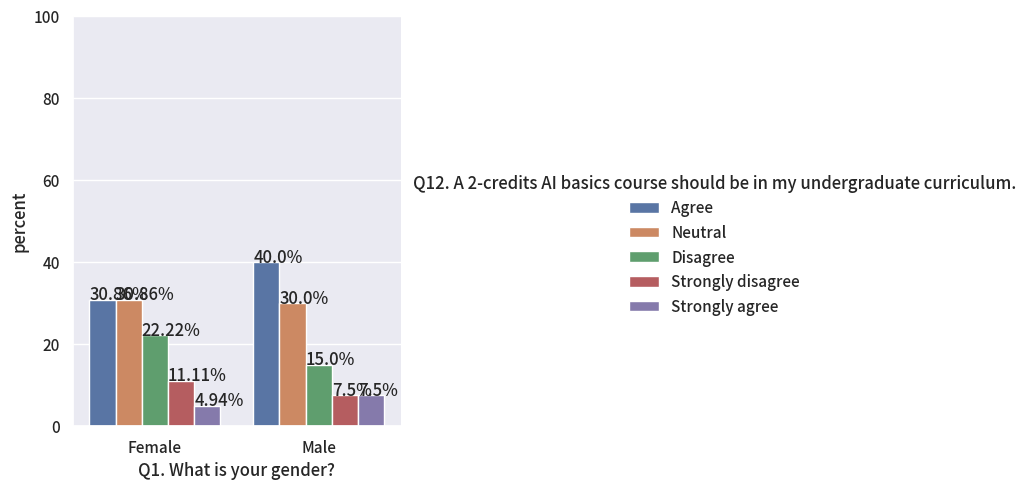

In [689]:
g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df_1)
g.ax.set_ylim(0,100)
for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

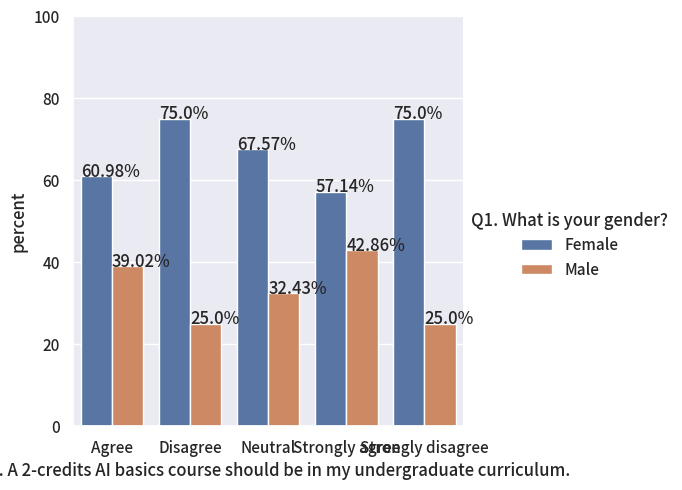

In [690]:
y, x = "Q1. What is your gender?", "Q12. A 2-credits AI basics course should be in my undergraduate curriculum."
df_1 = df.groupby(x)[y].value_counts(normalize=True)
df_1
df_1 = df_1.mul(100)
df_1
df_1 = df_1.rename('percent').reset_index()
df_1
g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df_1)
g.ax.set_ylim(0,100)
for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

Try:
- [python - Plotting percentage in seaborn bar plot - Stack Overflow](https://stackoverflow.com/questions/35692781/plotting-percentage-in-seaborn-bar-plot)

Note that the proportion line is max perceptage of 1.0, to aviod biases (see _How to Lie with Chart_)

In [691]:
x, y = "Q12. A 2-credits AI basics course should be in my undergraduate curriculum.", "Q1. What is your gender?"

df1 = df.groupby(x)[y].value_counts(normalize=True)
df1


Q12. A 2-credits AI basics course should be in my undergraduate curriculum.  Q1. What is your gender?
Agree                                                                        Female                      0.609756
                                                                             Male                        0.390244
Disagree                                                                     Female                      0.750000
                                                                             Male                        0.250000
Neutral                                                                      Female                      0.675676
                                                                             Male                        0.324324
Strongly agree                                                               Female                      0.571429
                                                                             Male                   

In [692]:
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()
df1

,Q12. A 2-credits AI basics course should be in my undergraduate curriculum.,Q1. What is your gender?,percent
0,Agree,Female,60.975610
1,Agree,Male,39.024390
2,Disagree,Female,75.000000
3,Disagree,Male,25.000000
4,Neutral,Female,67.567568
5,Neutral,Male,32.432432
6,Strongly agree,Female,57.142857
7,Strongly agree,Male,42.857143
8,Strongly disagree,Female,75.000000
9,Strongly disagree,Male,25.000000


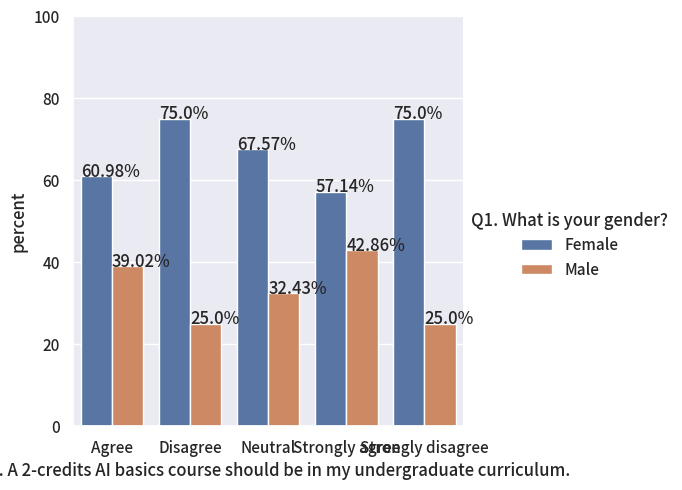

In [693]:
g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

In [694]:
scale4GECC = ['Strongly disagree', 'Disagree', 'Neutral', 'Agree', 'Strongly agree']
scale4GECC_course = ['Extremely likely', 'Likely', 'Uncertain', 'Unlikely', 'Extremely unlikely']
scale4GECC_aggregated = ['Disagree', 'Neutral', 'Agree']
color_scheme4broad =[
    plot_likert.colors.TRANSPARENT,
    "firebrick",
    # "lightcoral",
    "silver",
    # "cornflowerblue",
    "darkblue",
]

def customimze_label(ax):
    for bars, color in zip(ax.containers[1:], ['white'] + ['black'] * 2 + ['white'] * 2): # [pandas - Adding percentages to subgroups of each group likert-scale Python - Stack Overflow](https://stackoverflow.com/questions/70975856/adding-percentages-to-subgroups-of-each-group-likert-scale-python)
            ax.bar_label(bars, label_type='center', fmt='%.1f%%', color=color, fontsize=12)
def customimze_label_aggregated(ax):
    for bars, color in zip(ax.containers[1:], ['white'] + ['black'] + ['white']): # ['black'] * 2 + ['white'] is for "cornflowerblue"
            ax.bar_label(bars, label_type='center', color=color, fmt='%.1f%%', fontsize=12)
def plot_likert_customized(column_name):
    ax = plot_likert.plot_likert(df[column_name], scale4GECC, plot_percentage=True, figsize=(15,7), colors=plot_likert.colors.default_with_darker_neutral) # bar_labels=True
    customimze_label(ax)
def plot_likert_customized_resize(column_name, figsize_x, figsize_y):
    ax = plot_likert.plot_likert(df[column_name], scale4GECC, plot_percentage=True, figsize=(figsize_x,figsize_y), colors=plot_likert.colors.default_with_darker_neutral) # bar_labels=True
    customimze_label(ax)
def plot_likert_customized_course(column_name):
    ax = plot_likert.plot_likert(df[column_name], scale4GECC_course, plot_percentage=True, figsize=(15,7), colors=plot_likert.colors.default_with_darker_neutral) # bar_labels=True
    customimze_label(ax)
def plot_likert_customized_aggregated(column_name):
    ax = plot_likert.plot_likert(df_aggregated[column_name], scale4GECC_aggregated, plot_percentage=True, figsize=(15,7), colors=color_scheme4broad) # bar_labels=True
    customimze_label_aggregated(ax)
def plot_likert_customized_aggregated_resize(column_name, figsize_x, figsize_y):
    ax = plot_likert.plot_likert(df_aggregated[column_name], scale4GECC_aggregated, plot_percentage=True, figsize=(figsize_x, figsize_y), colors=color_scheme4broad) # bar_labels=True
    customimze_label_aggregated(ax)

# Likert-scale data aggregation

The +/-9% margin of error implies the 9.1% or "Strongly disagree" and 1.7% of "Strongly agree" in Q16 can be nearly same proportion: for example, the actual proportion of being "Strongly disagree" in the whole populatoin can be (9.1+min(margin of error))% = (9.1-9) = 0.1%; proportion of those being of "Strongly agree" can be (1.7-1.6)% = 0.1% where the margin of error this time is -1.6%. Then, in this example, the proportion of those in the whole population being "Strongly agree" and "Strongly disagree" is actually the same .

More broadly, because in the most of questions the studnet who express "Strongly agree" and "Strongly disagree" is less than 9%, which is the absolute value of the +/-9% margin of error, only after aggregating reponses on both "Agree" and "Strongly agree" into the broad agree category (same as the broad disagree category), can we draw meaningful conclusion (without making some statistical mistakes).

The data aggregation performed is based on an assumption. It is, in the same setting (e.g. same repondents) with the only different that we used 3-points Likert-scale, our survey reponses is similar to the one that we now have.
![](../why%20do%20aggregation.png)

c:\Users\phili\AppData\Local\Programs\Python\Python310\lib\site-packages\plot_likert\plot_likert.py:251: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  df = df.set_axis(new_labels, axis=1, inplace=False)
c:\Users\phili\AppData\Local\Programs\Python\Python310\lib\site-packages\plot_likert\plot_likert.py:251: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  df = df.set_axis(new_labels, axis=1, inplace=False)


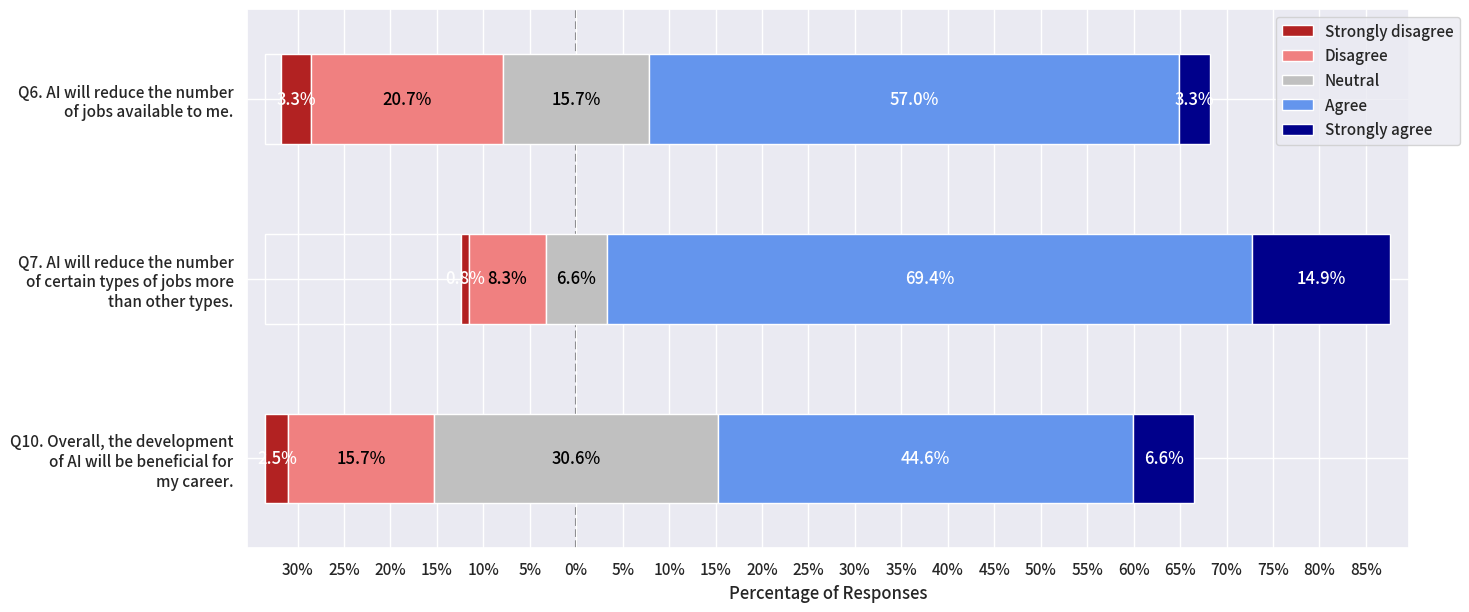

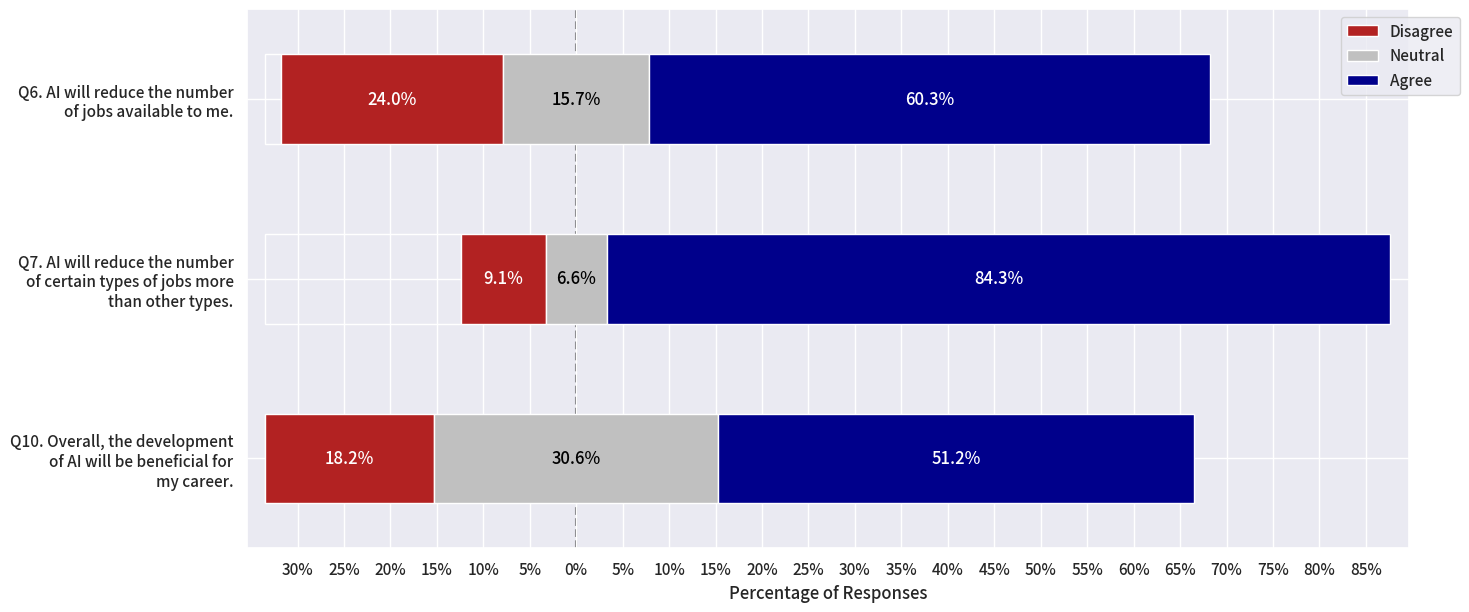

In [695]:
plot_likert_customized(AI_impact_prospects)
plot_likert_customized_aggregated(AI_impact_prospects)

# Summary Statistics

## Demographic Information

### Gender

In [696]:
df['Q1. What is your gender?']

0        Male
1      Female
2      Female
3      Female
4      Female
        ...  
116      Male
117      Male
118      Male
119    Female
120    Female
Name: Q1. What is your gender?, Length: 121, dtype: object

In [697]:
df['Q1. What is your gender?'].value_counts()

Female    81
Male      40
Name: Q1. What is your gender?, dtype: int64

[python - How to customize pandas pie plot with labels and legend - Stack Overflow](https://stackoverflow.com/questions/68909283/how-to-customize-pandas-pie-plot-with-labels-and-legend)

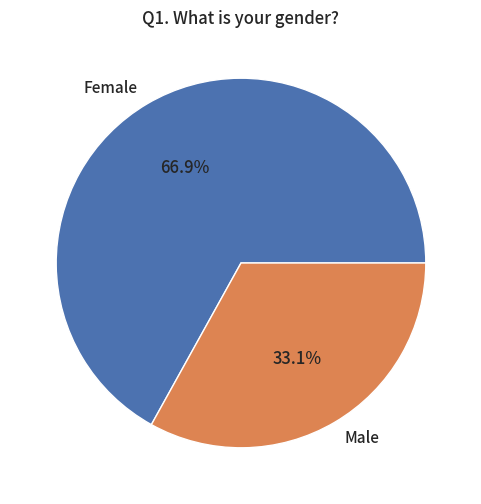

In [698]:
plot = df['Q1. What is your gender?'].value_counts().plot(kind='pie', autopct='%.1f%%', title='Q1. What is your gender?', ylabel='', figsize=(6, 6))

[python - How to Show the actual value instead of the percent in a Matplotlib Pie Chart - Stack Overflow](https://stackoverflow.com/questions/66450790/how-to-show-the-actual-value-instead-of-the-percent-in-a-matplotlib-pie-chart)
- Using the autopct keyword: [python - How to have actual values in matplotlib Pie Chart displayed - Stack Overflow](https://stackoverflow.com/questions/41088236/how-to-have-actual-values-in-matplotlib-pie-chart-displayed/41089685#41089685)

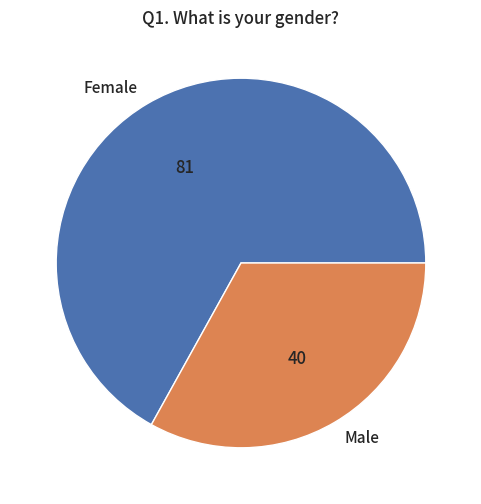

In [699]:
plot = df['Q1. What is your gender?'].value_counts().plot(kind='pie', 
    autopct=lambda x: '{:.0f}'.format(x*df['Q1. What is your gender?'].value_counts().sum()/100),
    
    title='Q1. What is your gender?', ylabel='', figsize=(6, 6))

[python - Matplotlib pie chart: Show both value and percentage - Stack Overflow](https://stackoverflow.com/questions/59644751/matplotlib-pie-chart-show-both-value-and-percentage)

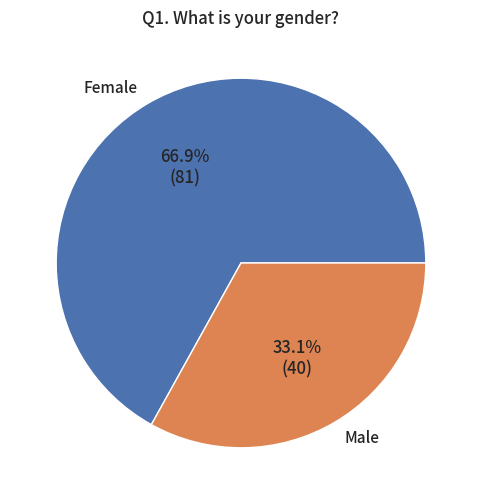

In [700]:
def autopct_format(values):
        def my_format(pct):
            total = sum(values)
            val = int(round(pct*total/100.0))
            return '{:.1f}%\n({v:d})'.format(pct, v=val)
        return my_format

plot = df['Q1. What is your gender?'].value_counts().plot(kind='pie', autopct=autopct_format(df['Q1. What is your gender?'].value_counts()), title='Q1. What is your gender?', ylabel='', figsize=(6, 6))


<AxesSubplot: >

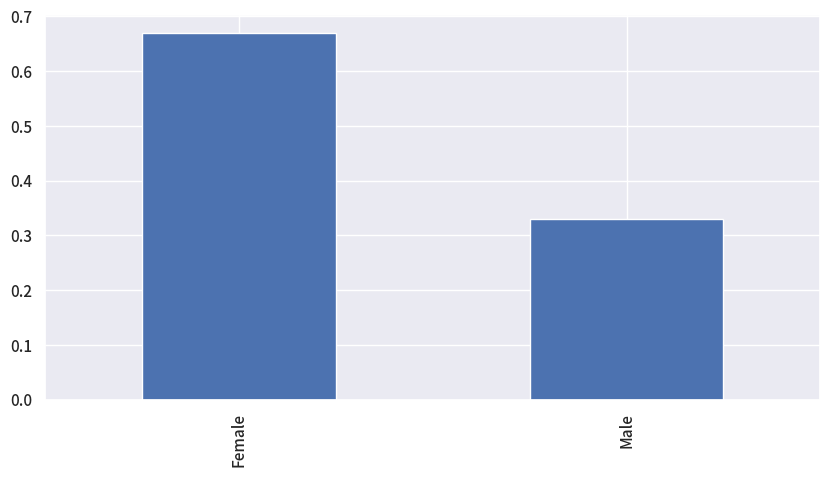

In [701]:
df['Q1. What is your gender?'].value_counts(normalize=True).plot(kind='bar', figsize=(10, 5))

### Year of Study

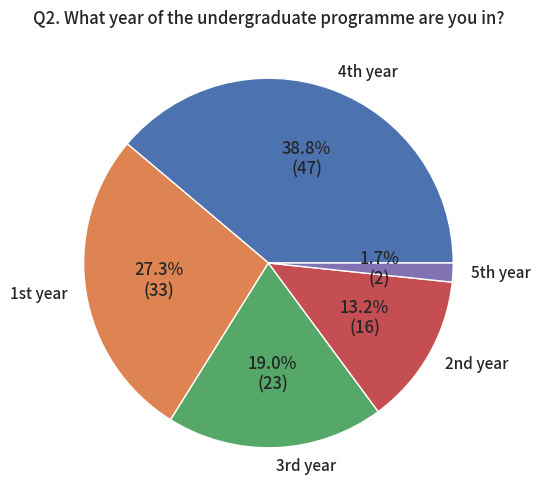

In [702]:
plot = df['Q2. What year of the undergraduate programme are you in?'].value_counts().plot(kind='pie', autopct=autopct_format(df['Q1. What is your gender?'].value_counts()), title='Q2. What year of the undergraduate programme are you in?', ylabel='', figsize=(6, 6))

### Academic discipline

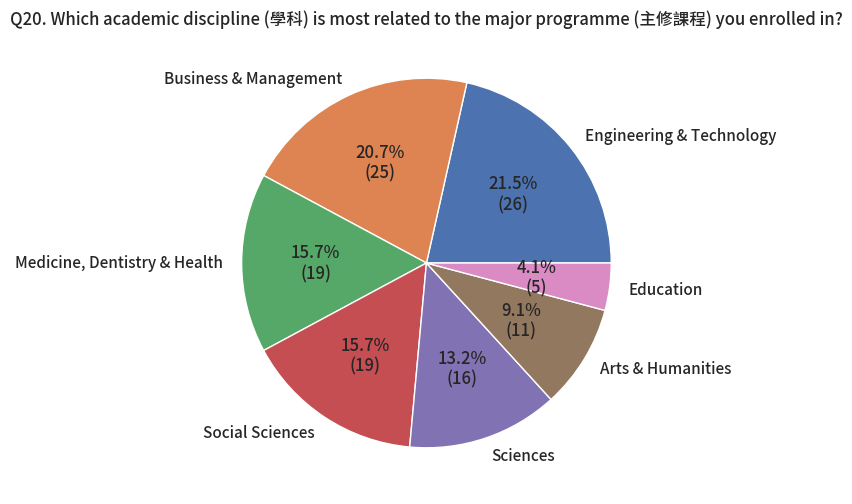

In [703]:
plot = df['Q20. Which academic discipline (學科) is most related to the major programme (主修課程) you enrolled in?'].value_counts().plot(
    kind='pie', autopct=autopct_format(df['Q1. What is your gender?'].value_counts()), 
    title='Q20. Which academic discipline (學科) is most related to the major programme (主修課程) you enrolled in?', ylabel='', figsize=(6, 6))

In [704]:
df['Q20. Which academic discipline (學科) is most related to the major programme (主修課程) you enrolled in?'].explode().unique()
# [python - pandas get unique values from column of lists - Stack Overflow](https://stackoverflow.com/questions/58528989/pandas-get-unique-values-from-column-of-lists)

array(['Engineering & Technology', 'Business & Management',
       'Medicine, Dentistry & Health', 'Arts & Humanities',
       'Social Sciences', 'Education', 'Sciences'], dtype=object)

In [705]:
df['Q20. Which academic discipline (學科) is most related to the major programme (主修課程) you enrolled in?'].replace(
    dict.fromkeys(['Engineering & Technology', 'Medicine, Dentistry & Health', 'Sciences'], 'STEM'), inplace=True
    ) # [string - how to replace multiple values with one value python - Stack Overflow](https://stackoverflow.com/questions/46920454/how-to-replace-multiple-values-with-one-value-python)
# df['Q20. Which academic discipline (學科) is most related to the major programme (主修課程) you enrolled in?'].replace({ 'Engineering & Technology' : 'STEM', 'Medicine, Dentistry & Health' : 'STEM', 'Sciences' : 'STEM'})
df['Q20. Which academic discipline (學科) is most related to the major programme (主修課程) you enrolled in?'].explode().unique()

array(['STEM', 'Business & Management', 'Arts & Humanities',
       'Social Sciences', 'Education'], dtype=object)

In [706]:
df['Q20. Which academic discipline (學科) is most related to the major programme (主修課程) you enrolled in?'].replace(
    dict.fromkeys(['Business & Management', 'Arts & Humanities',
       'Social Sciences', 'Education'], 'Non-STEM'), inplace=True
    )
df['Q20. Which academic discipline (學科) is most related to the major programme (主修課程) you enrolled in?'].explode().unique()

array(['STEM', 'Non-STEM'], dtype=object)

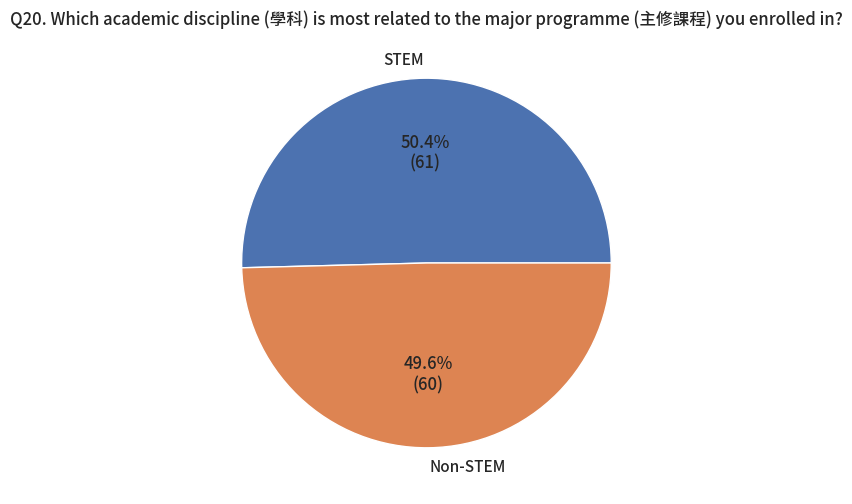

In [707]:
plot = df['Q20. Which academic discipline (學科) is most related to the major programme (主修課程) you enrolled in?'].value_counts().plot(
    kind='pie', autopct=autopct_format(df['Q1. What is your gender?'].value_counts()), 
    title='Q20. Which academic discipline (學科) is most related to the major programme (主修課程) you enrolled in?', ylabel='', figsize=(6, 6))

### Past/future exposure to AI

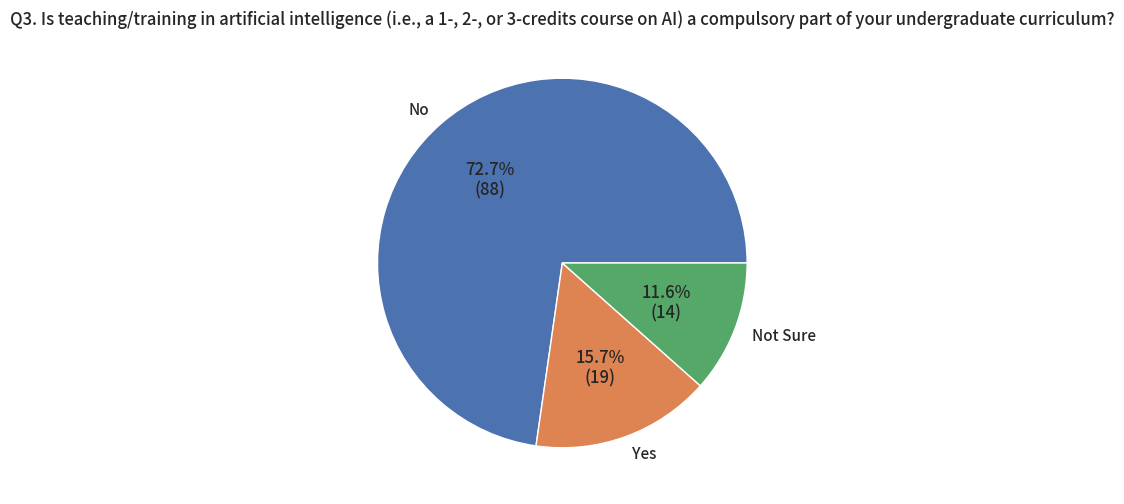

In [708]:
plot = df['Q3. Is teaching/training in artificial intelligence (i.e., a 1-, 2-, or 3-credits course on AI) a compulsory part of your undergraduate curriculum?'].value_counts().plot(
    kind='pie', autopct=autopct_format(df['Q3. Is teaching/training in artificial intelligence (i.e., a 1-, 2-, or 3-credits course on AI) a compulsory part of your undergraduate curriculum?'].value_counts()), 
    title='Q3. Is teaching/training in artificial intelligence (i.e., a 1-, 2-, or 3-credits course on AI) a compulsory part of your undergraduate curriculum?', ylabel='', figsize=(6, 6))

# Draft-zero Likert-scale analysis

## YouTube example

<AxesSubplot: xlabel='Q7. AI will reduce the number of certain types of jobs more than other types.', ylabel='count'>

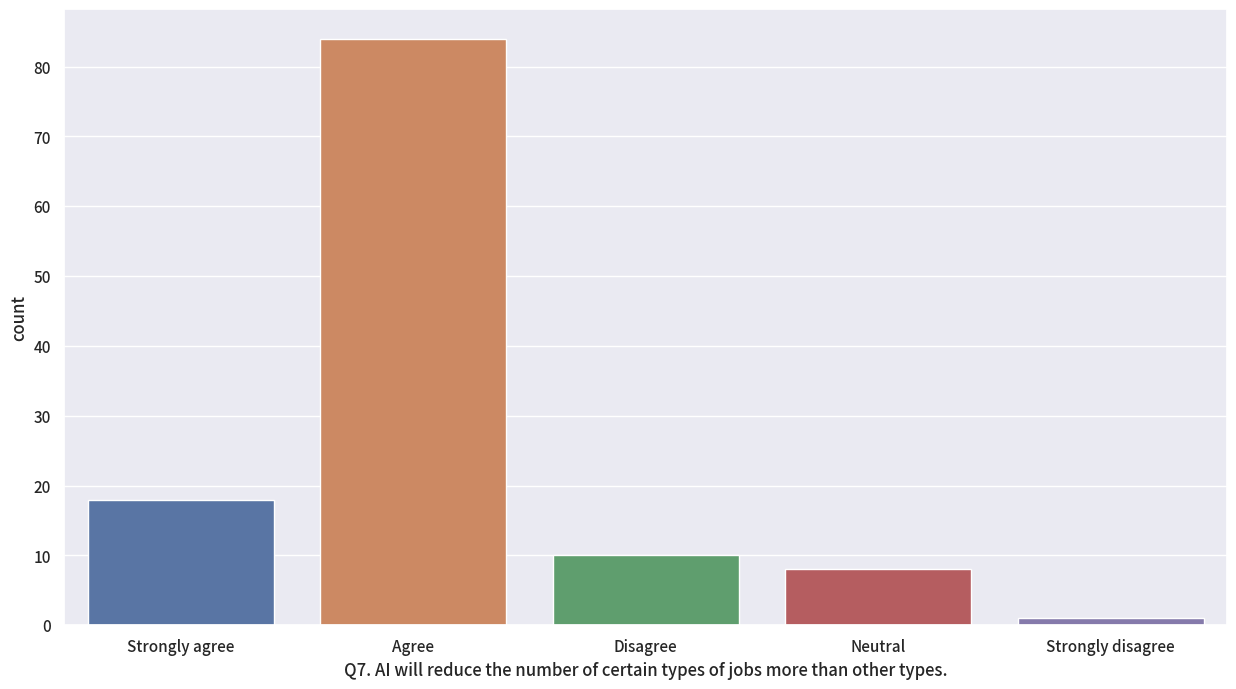

In [709]:
sns.countplot(data=df, x='Q7. AI will reduce the number of certain types of jobs more than other types.')

In [710]:
ax = sns.barplot(x='Q7. AI will reduce the number of certain types of jobs more than other types.', y='Q7. AI will reduce the number of certain types of jobs more than other types.', data=df, estimator=lambda x: len(x) / len(df) * 100)
ax.set(ylabel="Percent")

TypeError: Neither the `x` nor `y` variable appears to be numeric.

<AxesSubplot: xlabel='Q7. AI will reduce the number of certain types of jobs more than other types.', ylabel='Percent'>

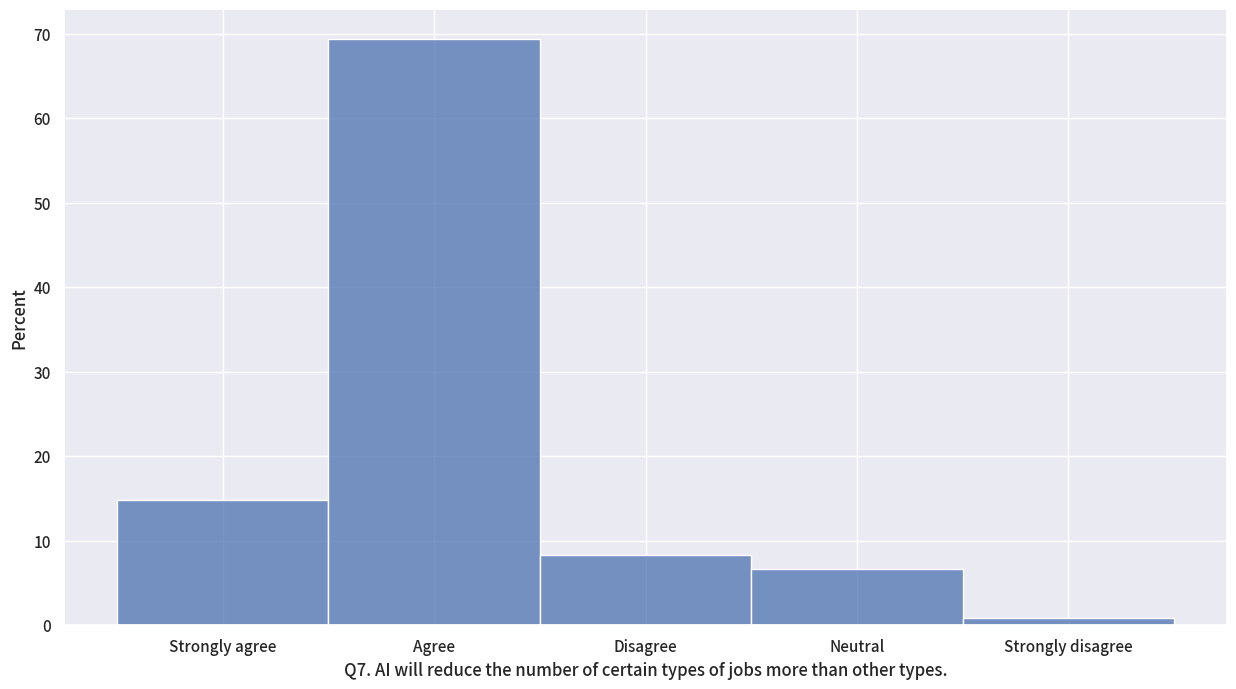

In [ ]:
sns.histplot(df, x='Q7. AI will reduce the number of certain types of jobs more than other types.', stat="percent")

In [ ]:
tips = sns.load_dataset("tips")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


<AxesSubplot: xlabel='day', ylabel='Probability'>

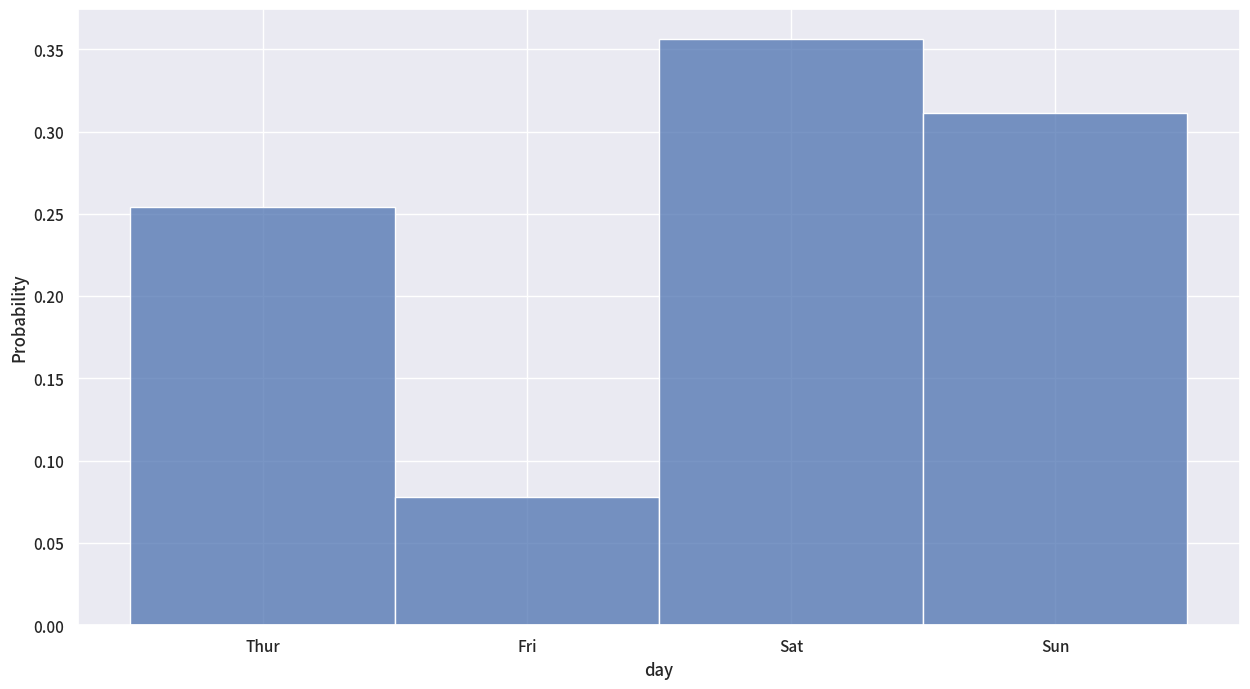

In [ ]:
sns.histplot(tips, x="day", stat="probability")

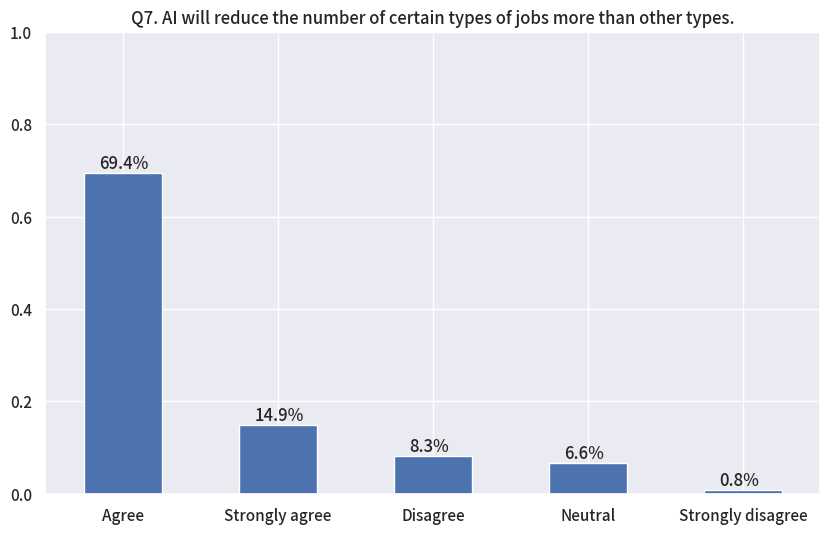

In [ ]:
# Make a bar plot for column 'Q7. AI will reduce the number of certain types of jobs more than other types. And then normalize the above bar plot
plot = df['Q7. AI will reduce the number of certain types of jobs more than other types.'].value_counts(normalize=True).plot(kind='bar', figsize=(10, 6))
# show percentages on the bars
for p in plot.patches:
    plot.annotate('{:.1f}%'.format(p.get_height()*100), (p.get_x()+0.1, p.get_height()+0.01))
# move the bars closer to each other along the x-axis
plot.set_xticklabels(plot.get_xticklabels(), rotation=0, horizontalalignment='center')
# Add a title
plot.set_title('Q7. AI will reduce the number of certain types of jobs more than other types.')
# Set the y-axis to 100%
plot.set_ylim(0, 1)
# Make the bars stacked togather along the x-axis
plot.set_axisbelow(True)
# Make the above code reusable
def plot_bar_with_percentage(df, column_name, rotation=0, horizontalalignment='center'):
    plot = df[column_name].value_counts(normalize=True).plot(kind='bar', figsize=(10, 6)) 
    for p in plot.patches:
        plot.annotate('{:.1f}%'.format(p.get_height()*100), (p.get_x()+0.1, p.get_height()+0.01))
    plot.set_xticklabels(plot.get_xticklabels(), rotation=0, horizontalalignment=horizontalalignment)
    plot.set_title(column_name)
    plot.set_ylim(0, 1)

In [ ]:
frequencies = {} #Curly braces are used in python to define a dictionary
for i in df_aggregated[AI_edu_necessity].columns:
    frequencies[i] = df[AI_edu_necessity][i].value_counts()
display(frequencies)
df_plot_data = pd.DataFrame(frequencies)

{'Q11. Learning about AI basics, namely, the above-mentioned course(s), will be beneficial for my career.': Agree                62
 Neutral              31
 Disagree             12
 Strongly agree       10
 Strongly disagree     6
 Name: Q11. Learning about AI basics, namely, the above-mentioned course(s), will be beneficial for my career., dtype: int64,
 'Q12. A 2-credits AI basics course should be in my undergraduate curriculum.': Agree                41
 Neutral              37
 Disagree             24
 Strongly disagree    12
 Strongly agree        7
 Name: Q12. A 2-credits AI basics course should be in my undergraduate curriculum., dtype: int64}

In [ ]:
# Make the above code a function accepting a dataframe and a column name
def get_frequencies(df, column_name):
    frequencies = {} #Curly braces are used in python to define a dictionary
    for i in df[column_name]:
        frequencies[i] = df[column_name][i].value_counts()
    return pd.DataFrame(frequencies)

In [ ]:
df_plot_data.head()

,"Q11. Learning about AI basics, namely, the above-mentioned course(s), will be beneficial for my career.",Q12. A 2-credits AI basics course should be in my undergraduate curriculum.
Agree,62,41
Disagree,12,24
Neutral,31,37
Strongly agree,10,7
Strongly disagree,6,12


[python - How to sort pandas dataframe by custom order on string index - Stack Overflow](https://stackoverflow.com/questions/50012525/how-to-sort-pandas-dataframe-by-custom-order-on-string-index)

In [ ]:
reorderlist = [ 'Strongly agree', 'Agree','Neutral' ,'Disagree' ,'Strongly disagree']
df_plot_data.reindex(reorderlist)

,"Q11. Learning about AI basics, namely, the above-mentioned course(s), will be beneficial for my career.",Q12. A 2-credits AI basics course should be in my undergraduate curriculum.
Strongly agree,10,7
Agree,62,41
Neutral,31,37
Disagree,12,24
Strongly disagree,6,12


<AxesSubplot: >

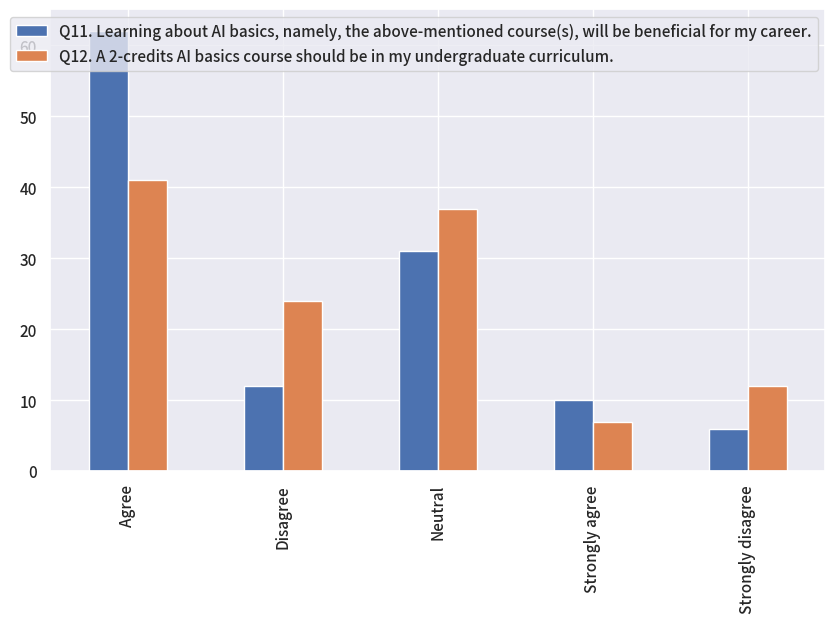

In [ ]:
df_plot_data.plot(kind='bar', figsize=(10, 6))

<AxesSubplot: >

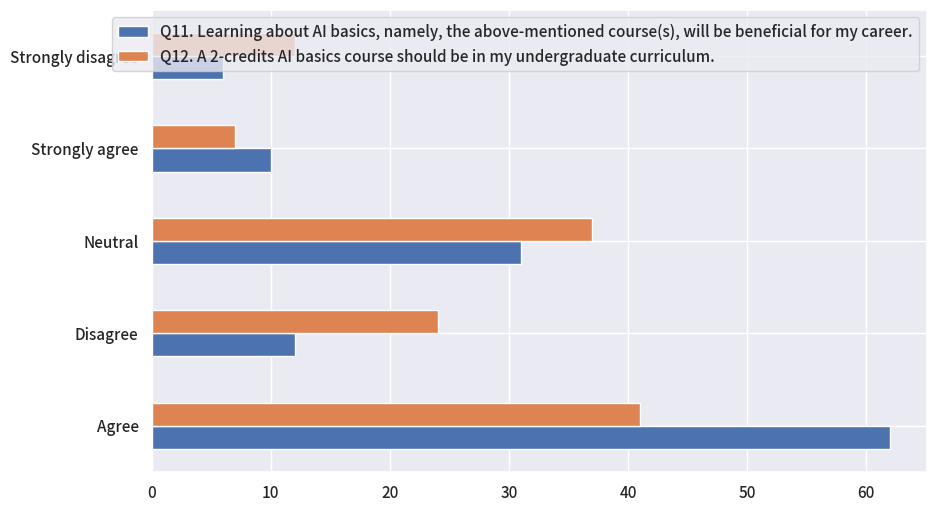

In [ ]:
df_plot_data.plot(kind='barh', figsize=(10, 6))

# I. Knowledge of AI

c:\Users\phili\AppData\Local\Programs\Python\Python310\lib\site-packages\plot_likert\plot_likert.py:251: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  df = df.set_axis(new_labels, axis=1, inplace=False)
c:\Users\phili\AppData\Local\Programs\Python\Python310\lib\site-packages\plot_likert\plot_likert.py:251: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  df = df.set_axis(new_labels, axis=1, inplace=False)


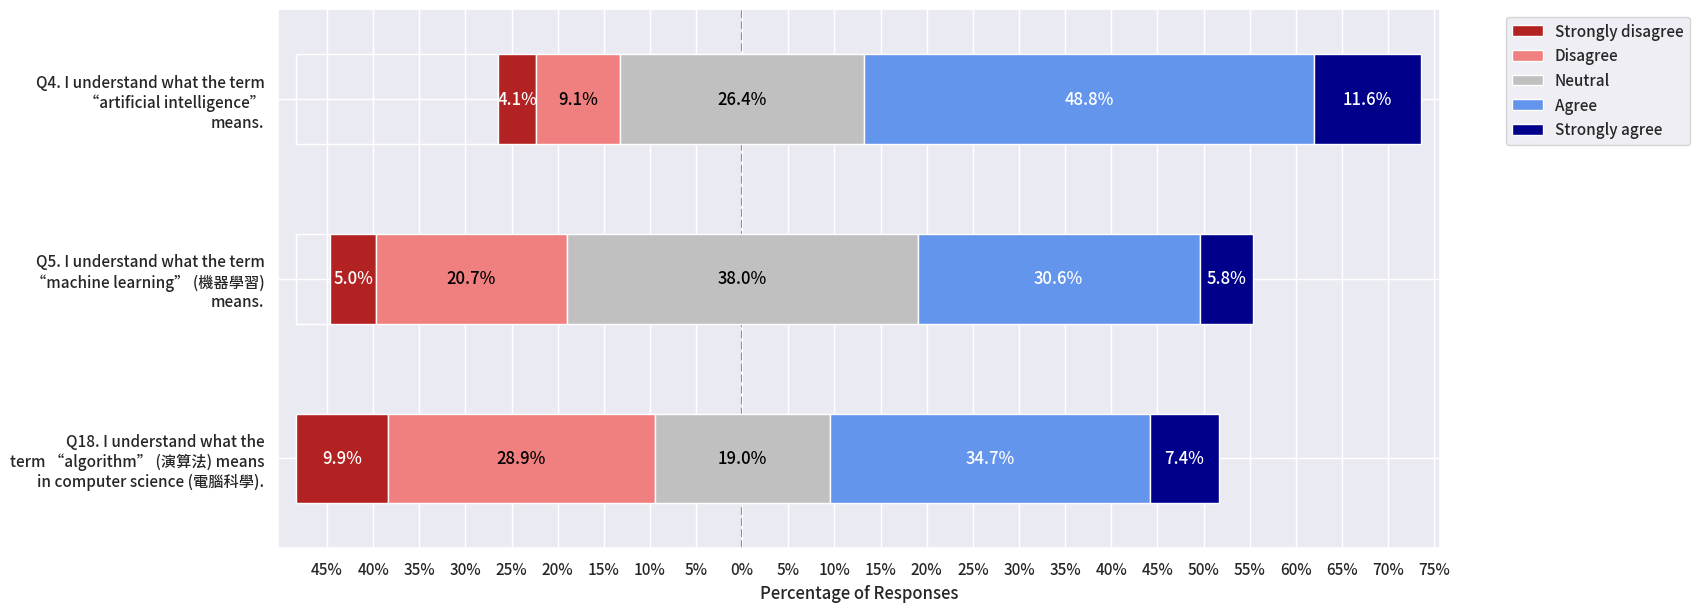

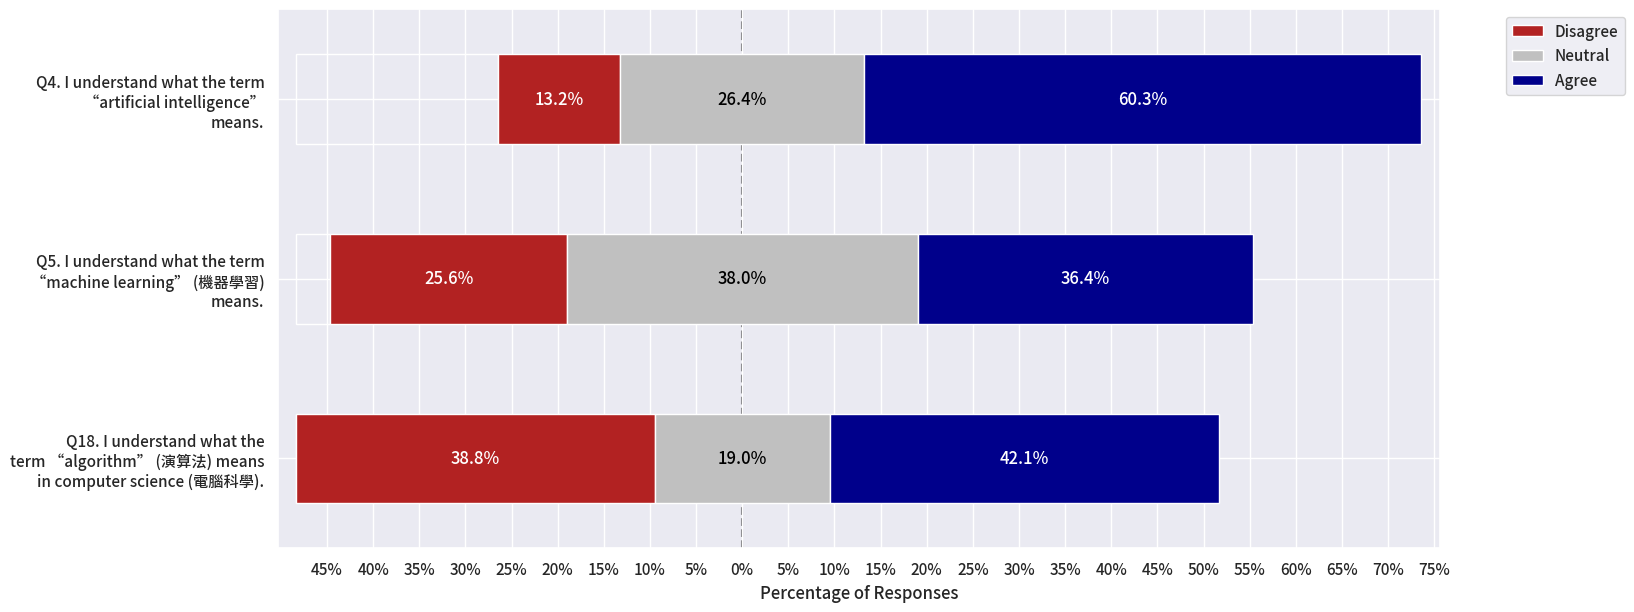

In [ ]:
plot_likert_customized(AI_knowledge)
plot_likert_customized_aggregated(AI_knowledge)

In [ ]:
# A function to check whether the difference of two numbers is larger than 18, return "Ok, it means that they are differnet in proportion" if the difference is larger than 18; if not, return "No, they are the same in proportion"; and return the difference
def check_diff(Q_A_argree_sum, Q_B_argree_sum):
    margin_error = 9
    diff = abs(Q_A_argree_sum-Q_B_argree_sum)
    if (diff > margin_error * 2):
        print('Ok, they are differnet in term of proportion')
    else:
        print('No, they can be the same in term of proportion')
    print('Difference = ' + str(diff))
    print("Room for safety = " + str(diff - margin_error * 2))

On the argee side

In [ ]:
check_diff(60.3, 36.4)

Ok, it means that they are differnet in proportion
Difference = 23.9
Room for safety = 5.899999999999999


23.9

Neutral

In [ ]:
check_diff(38, 19)

Ok, it means that they are differnet in proportion
Difference = 19
Room for safety = 1


19

Disagree

In [ ]:
check_diff(13, 36)

Ok, it means that they are differnet in proportion
Difference = 23
Room for safety = 5


23

So, only Q4, Q5 worth comparing.

## A close look of Q4, Q5

c:\Users\phili\AppData\Local\Programs\Python\Python310\lib\site-packages\plot_likert\plot_likert.py:251: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  df = df.set_axis(new_labels, axis=1, inplace=False)


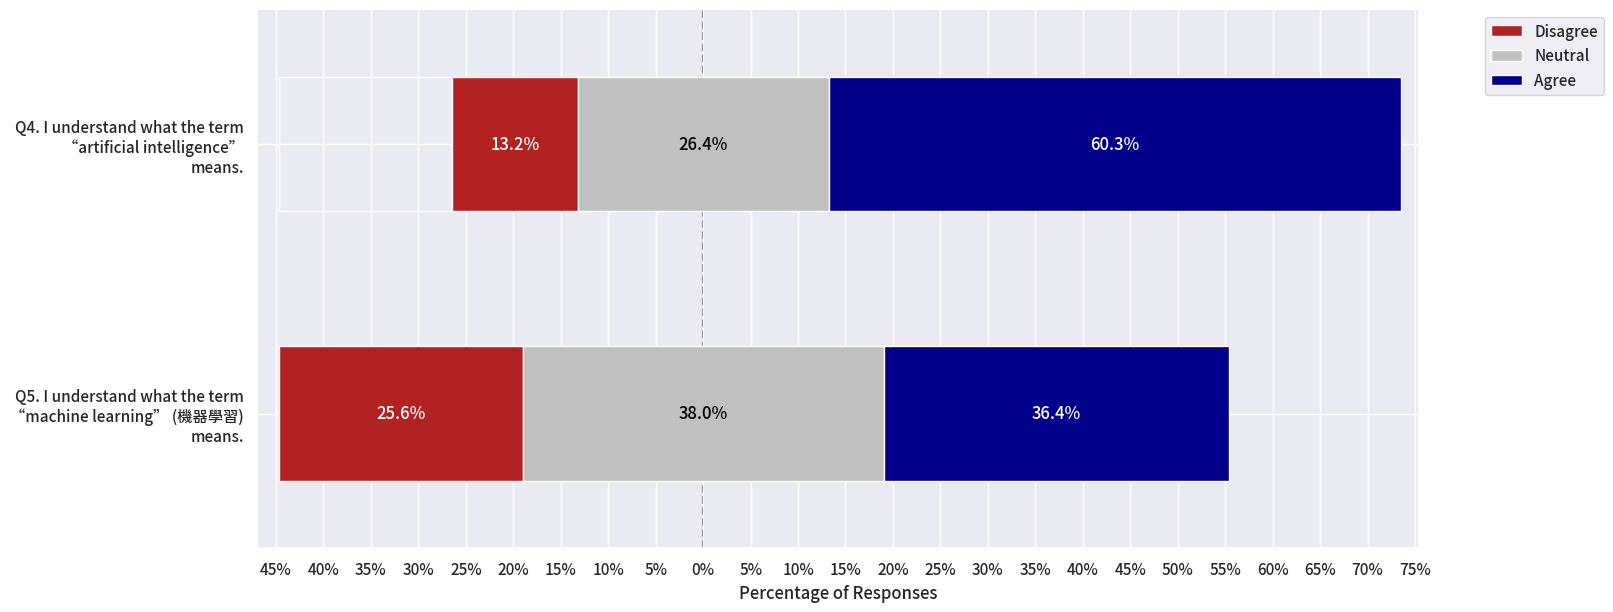

In [ ]:
plot_likert_customized_aggregated(AI_knowledge[0:2])

Comparison: general concept vs. specific concept

# II. View on the Impact of AI on Jobs

c:\Users\phili\AppData\Local\Programs\Python\Python310\lib\site-packages\plot_likert\plot_likert.py:251: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  df = df.set_axis(new_labels, axis=1, inplace=False)


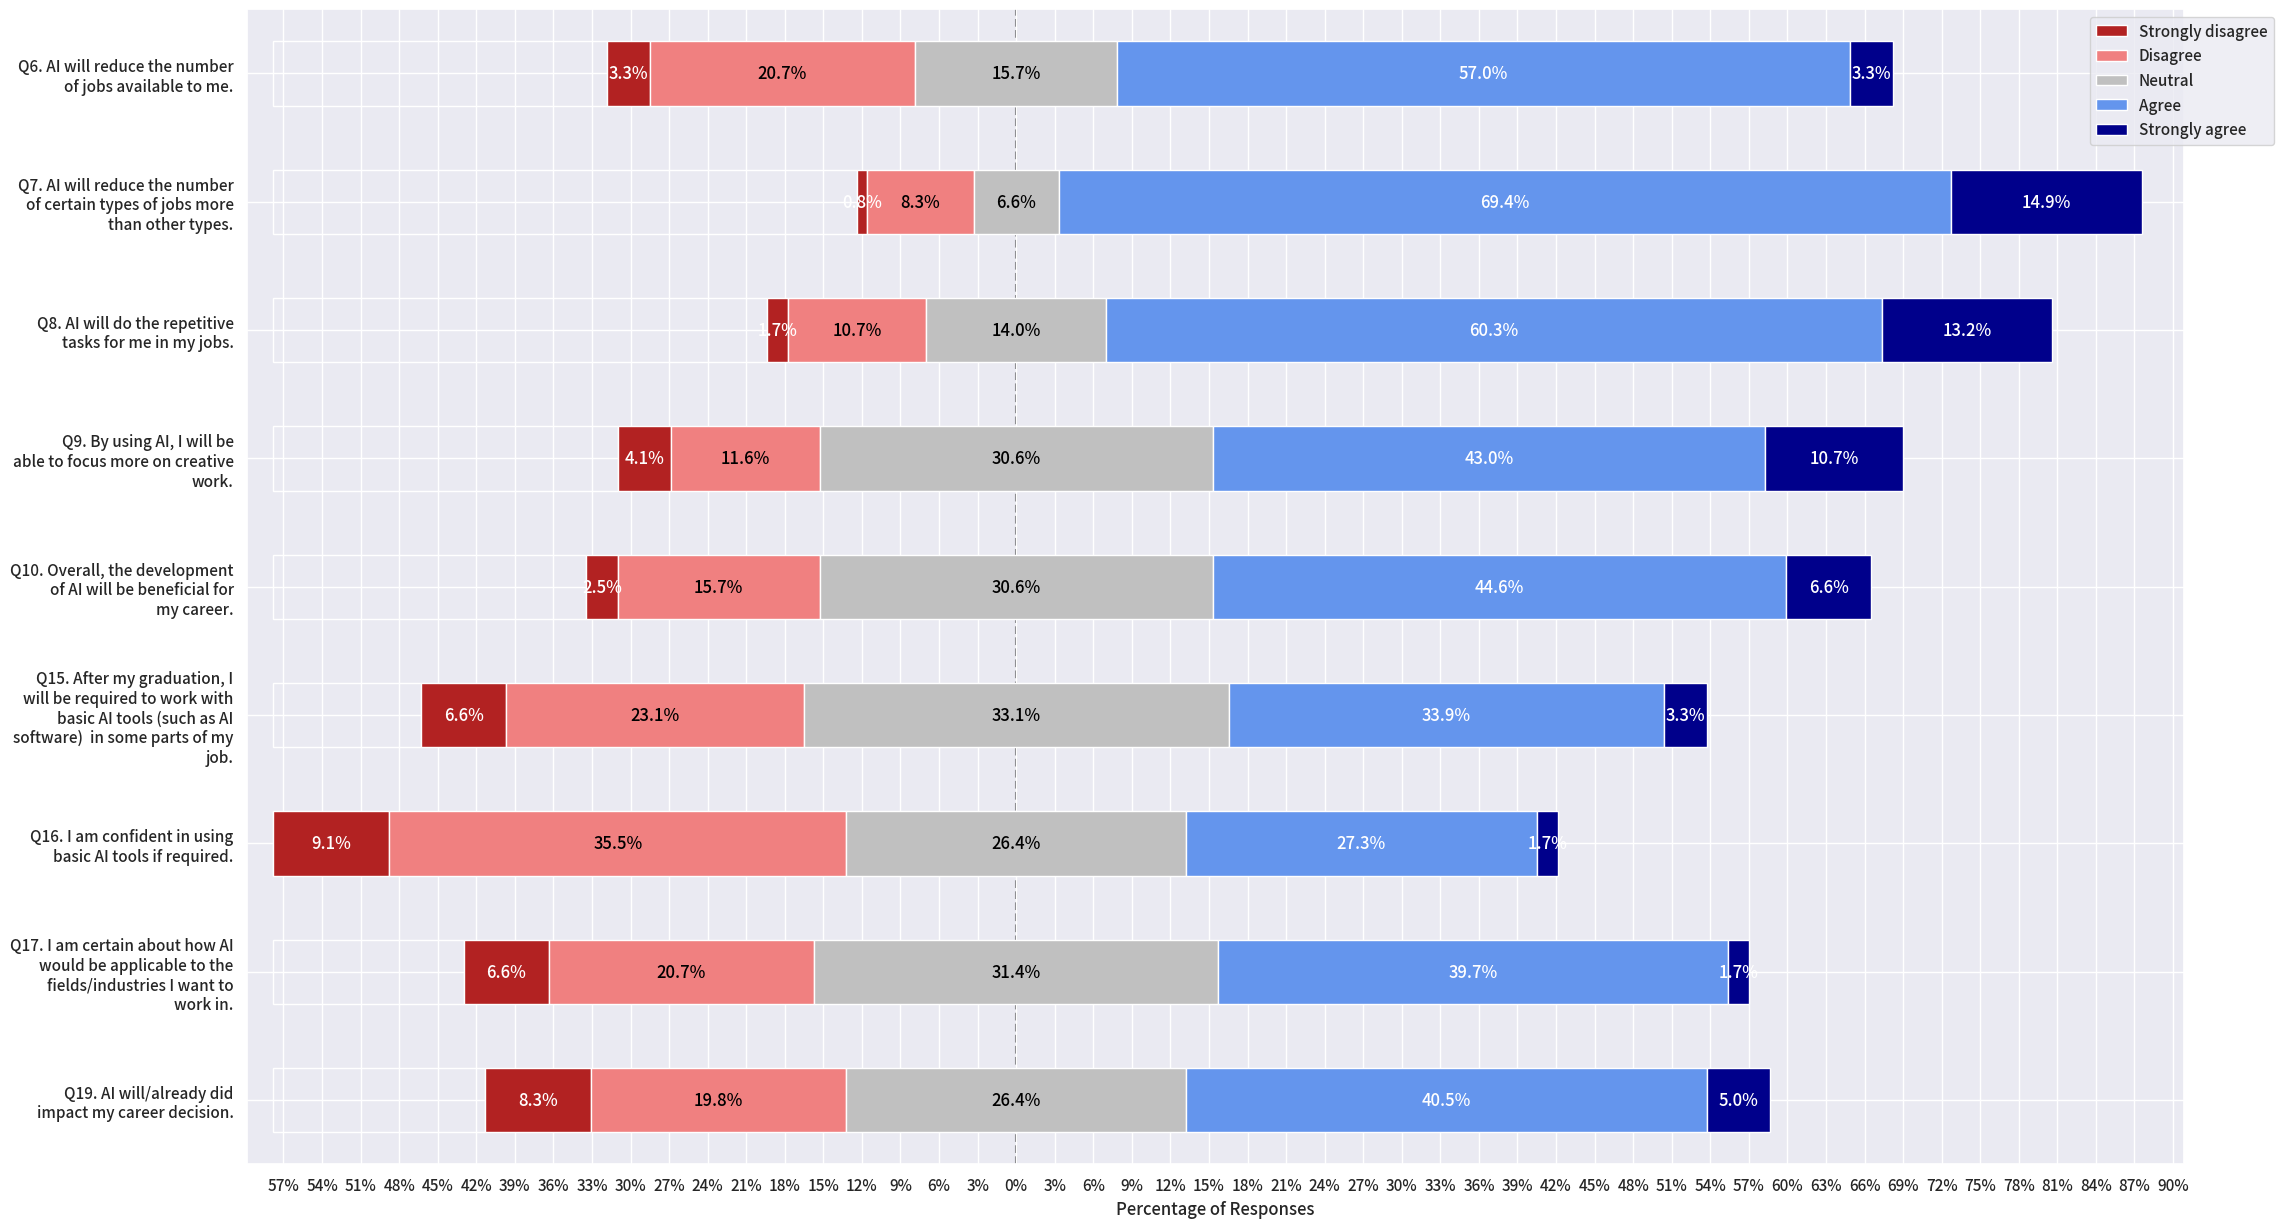

In [ ]:
plot_likert_customized_resize(AI_impact, 25, 15)

The following results circled, worths further analysis
![](../output_annotated3.png)
[python - Inserting image into IPython notebook markdown - Stack Overflow](https://stackoverflow.com/questions/10628262/inserting-image-into-ipython-notebook-markdown)

## Point: "Neutral" stand? Or just "uncertain"?

![](../impact_neutral.png "plot_likert_customized_aggregated_resize(AI_impact, 15, 10)")
e.g. many respondents chose "Neutral": in 4 question items, >30% of p chose "Neutral", what's the reason?

### The difference in proportion

For example, the creative vs. repetitive contrasting case

In [ ]:
check_diff(14, 30.6)

No, they are the same in proportion
Difference = 16.6
Room for safety = -1.3999999999999986


16.6

Unfortunately, the differences is not large enough. So, 'Q7. AI will reduce the number of certain types of jobs more than other types.' vs. 'Q10. Overall, the development of AI will be beneficial for my career.'
- disadvantageous to some people (perhaps include the respondent themselves) vs. beneficial to myself
- still the societal vs. personal impact comparison 

In [ ]:
check_diff(6.6, 30.6)

Ok, they are differnet in term of proportion
Difference = 24.0
Room for safety = 6.0


24.0

### The similarity in proportion
![](../similarityin_proportion.png)
Considering the +-9% margin of error, those circled have the proportion of the all three options that are actually similar.
Even when taking a possible -9% effort fron the margin of erorr on the actual proportion in the whole population into acount, we still have items Q15, Q17 that reflect there are 20%+ of students who are neutural/uncertain.

It show that the undergraduate who are neutrual/uncertain is not a small portion.

## I. 3Q for AI_impact_prospect

c:\Users\phili\AppData\Local\Programs\Python\Python310\lib\site-packages\plot_likert\plot_likert.py:251: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  df = df.set_axis(new_labels, axis=1, inplace=False)


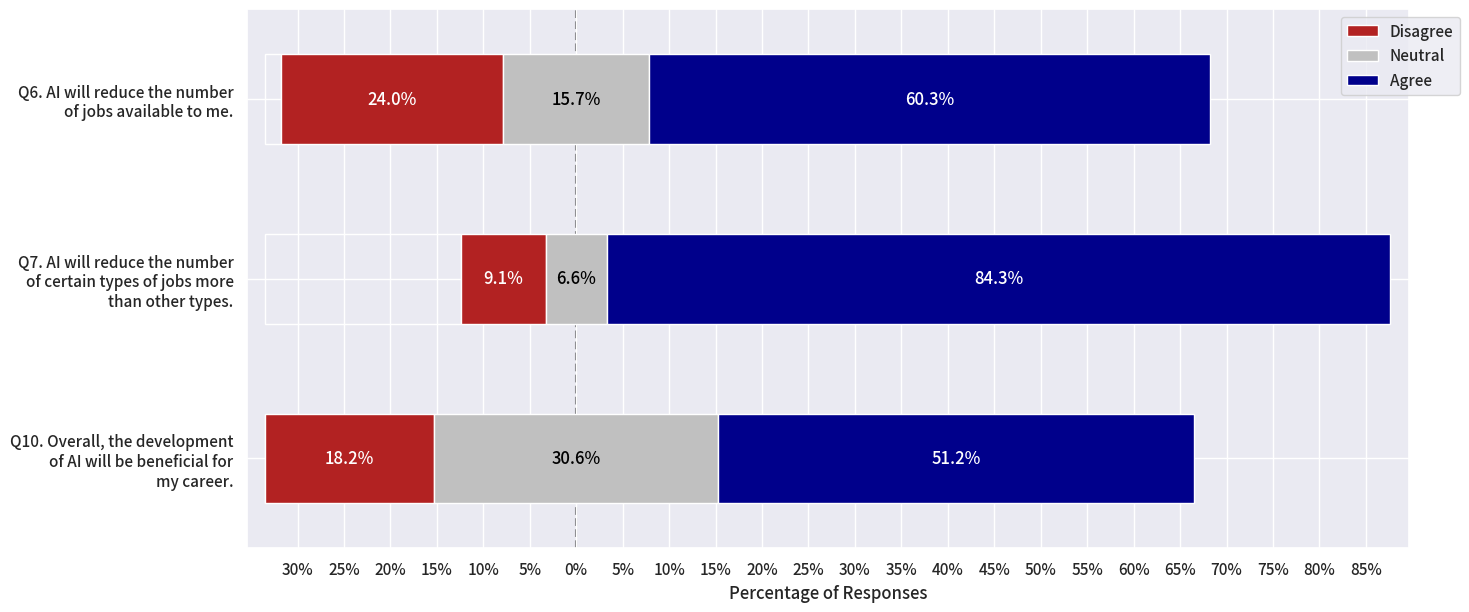

In [ ]:
plot_likert_customized_aggregated(AI_impact_prospects)

### Comparison: personal vs. societal level

c:\Users\phili\AppData\Local\Programs\Python\Python310\lib\site-packages\plot_likert\plot_likert.py:251: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  df = df.set_axis(new_labels, axis=1, inplace=False)


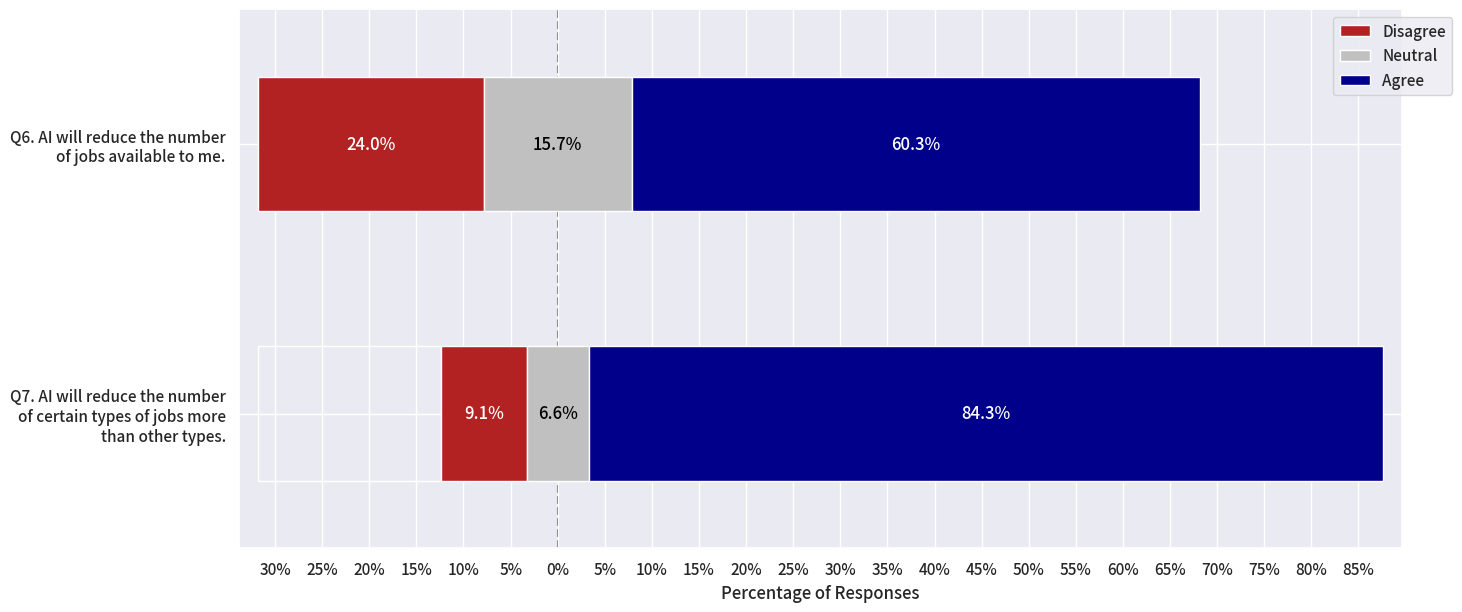

In [ ]:
plot_likert_customized_aggregated(AI_impact_prospects[0:2])

Agree comparision: show that they are more More optimistic about themselves

In [ ]:
check_diff(60.3, 84.3)

Ok, it means that they are differnet in proportion
Difference = 24.0
Room for safety = 6.0


24.0

In [ ]:
check_diff(24, 9.1)

No, they are the same in proportion
Difference = 14.9
Room for safety = -3.0999999999999996


14.9

c:\Users\phili\AppData\Local\Programs\Python\Python310\lib\site-packages\plot_likert\plot_likert.py:251: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  df = df.set_axis(new_labels, axis=1, inplace=False)


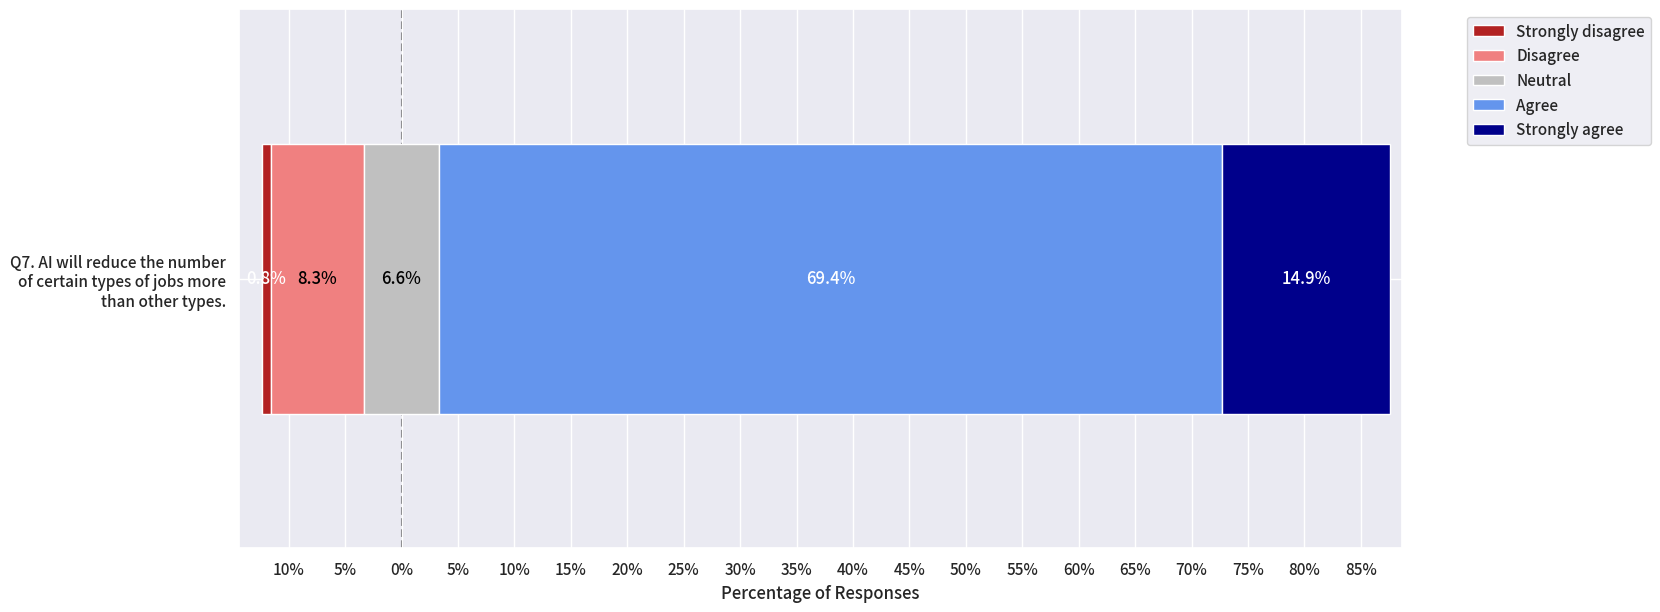

In [ ]:
plot_likert_customized('Q7. AI will reduce the number of certain types of jobs more than other types.')

pessimistic to the overall jobs market, 14.9% strongly argee

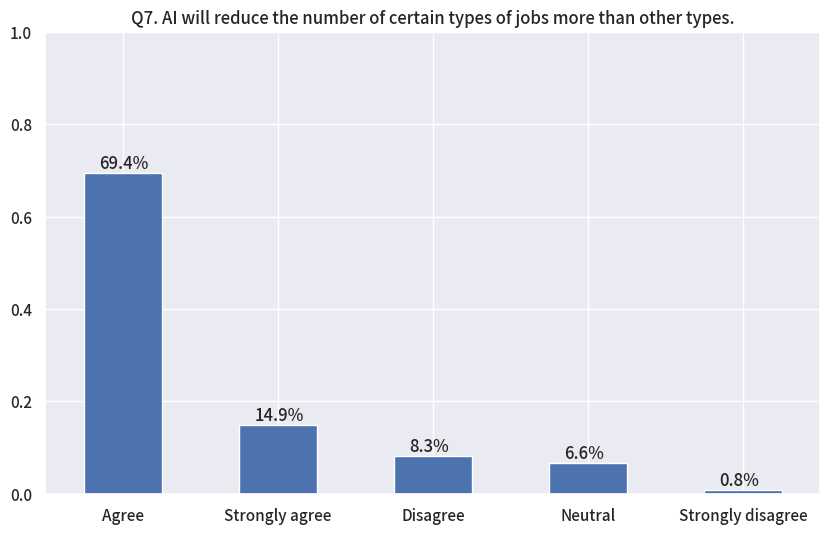

In [ ]:
plot_bar_with_percentage(df, 'Q7. AI will reduce the number of certain types of jobs more than other types.')

## II. 2Q for AI_impact_nature_of_work

c:\Users\phili\AppData\Local\Programs\Python\Python310\lib\site-packages\plot_likert\plot_likert.py:251: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  df = df.set_axis(new_labels, axis=1, inplace=False)


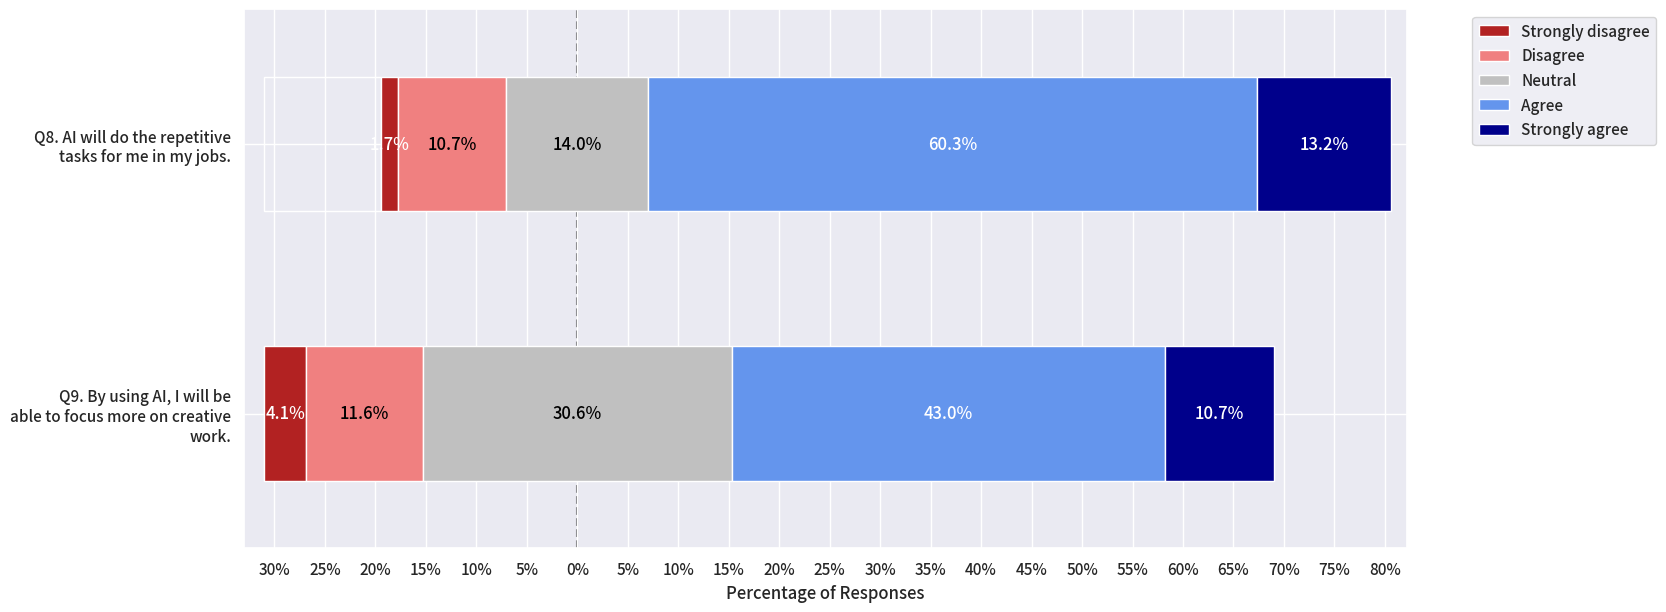

In [ ]:
plot_likert_customized(AI_impact_nature_of_work)

In [ ]:
AI_impact_nature_of_work

['Q8. AI will do the repetitive tasks for me in my jobs.',
 'Q9. By using AI, I will be able to focus more on creative work.']

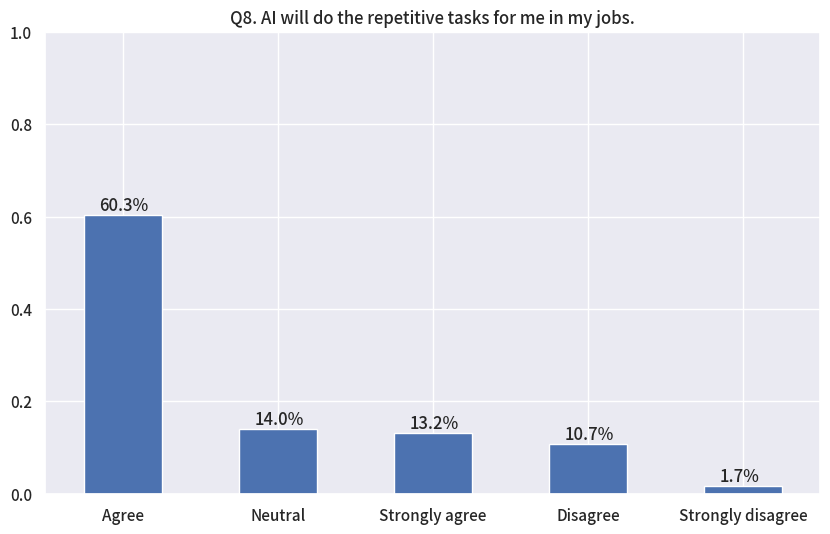

In [716]:
plot_bar_with_percentage(df, 'Q8. AI will do the repetitive tasks for me in my jobs.')

c:\Users\phili\AppData\Local\Programs\Python\Python310\lib\site-packages\plot_likert\plot_likert.py:251: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  df = df.set_axis(new_labels, axis=1, inplace=False)


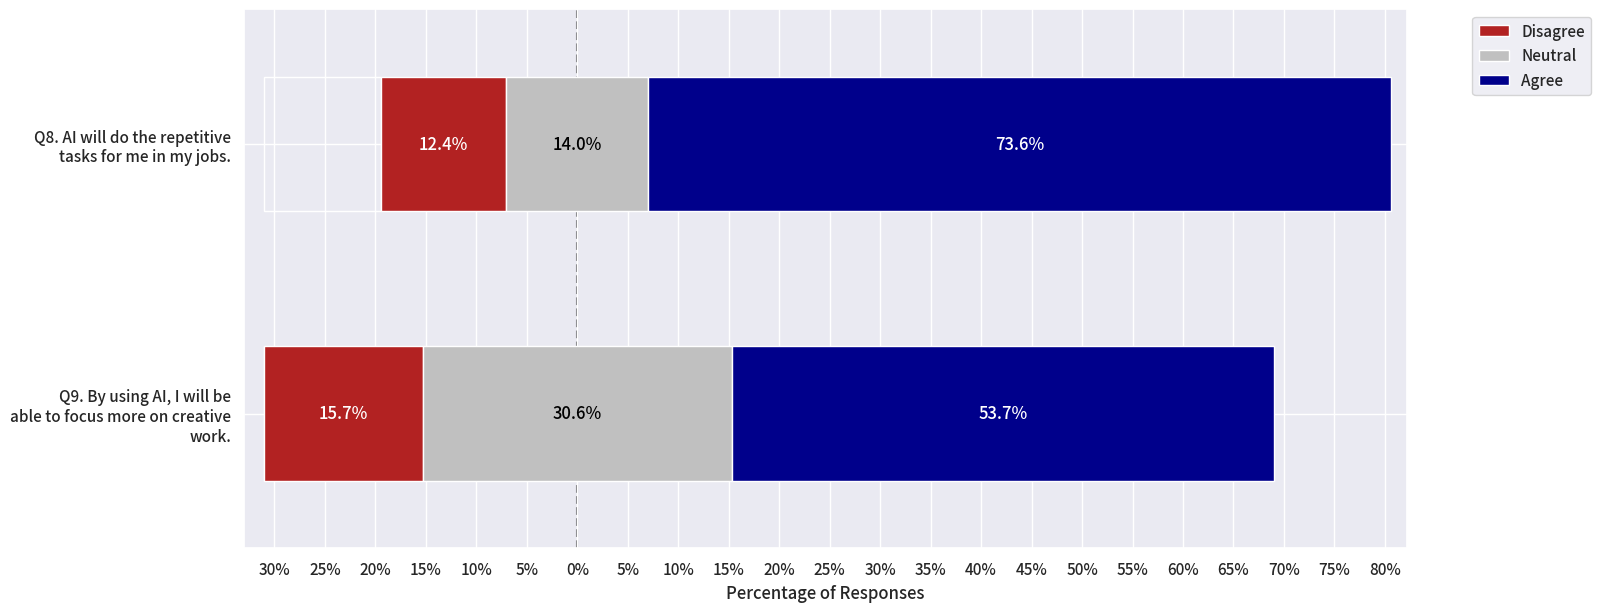

In [ ]:
plot_likert_customized_aggregated(AI_impact_nature_of_work)

Agree

In [ ]:
check_diff(73.6, 53.7)

Ok, they are differnet in term of proportion
Difference = 19.89999999999999
Room for safety = 1.8999999999999915


### The majority undergradates recognize the usefulness of AI

Within Q8

In [ ]:
check_diff(73.6, 12.4)

Ok, they are differnet in term of proportion
Difference = 61.199999999999996
Room for safety = 43.199999999999996


Within Q9

In [ ]:
check_diff(53.7, 15.7)

Ok, they are differnet in term of proportion
Difference = 38.0
Room for safety = 20.0


## III. 3Q for AI_impact_tools

c:\Users\phili\AppData\Local\Programs\Python\Python310\lib\site-packages\plot_likert\plot_likert.py:251: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  df = df.set_axis(new_labels, axis=1, inplace=False)


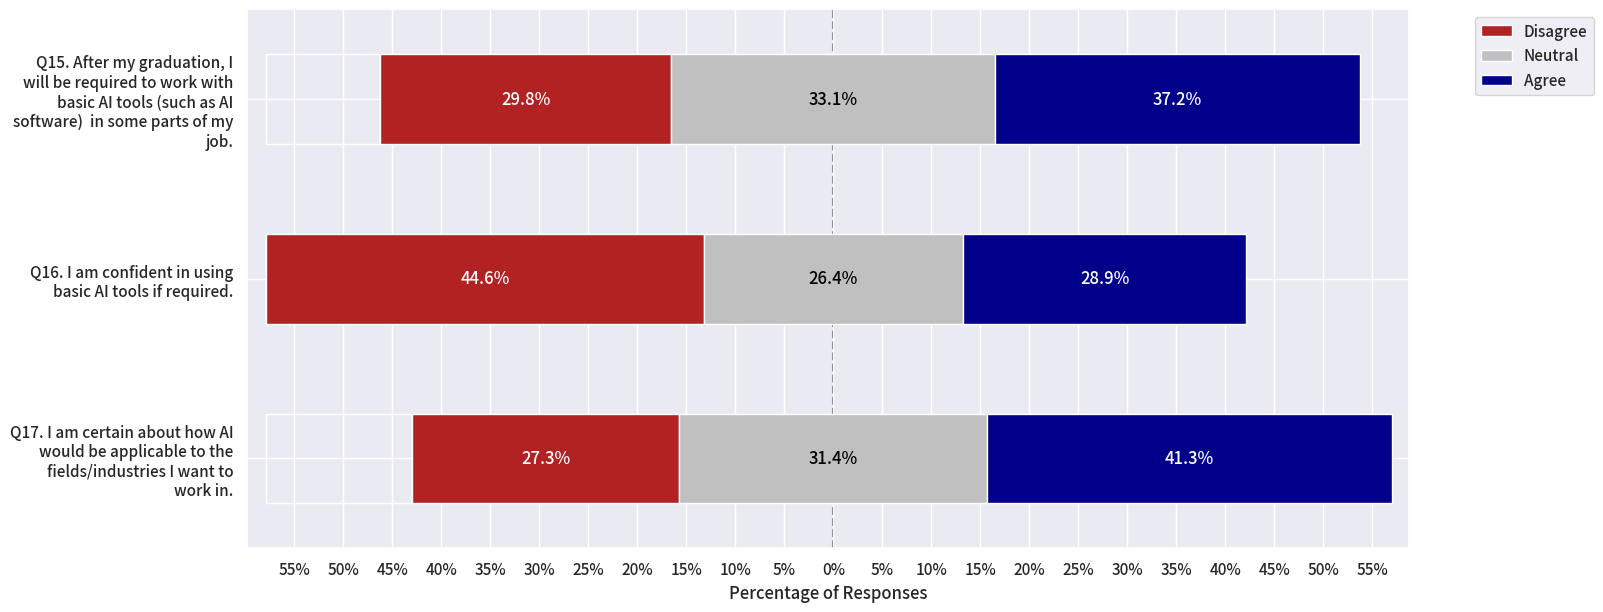

In [715]:
plot_likert_customized_aggregated(AI_impact_tools)

## III. 1Q for AI_impact_decision

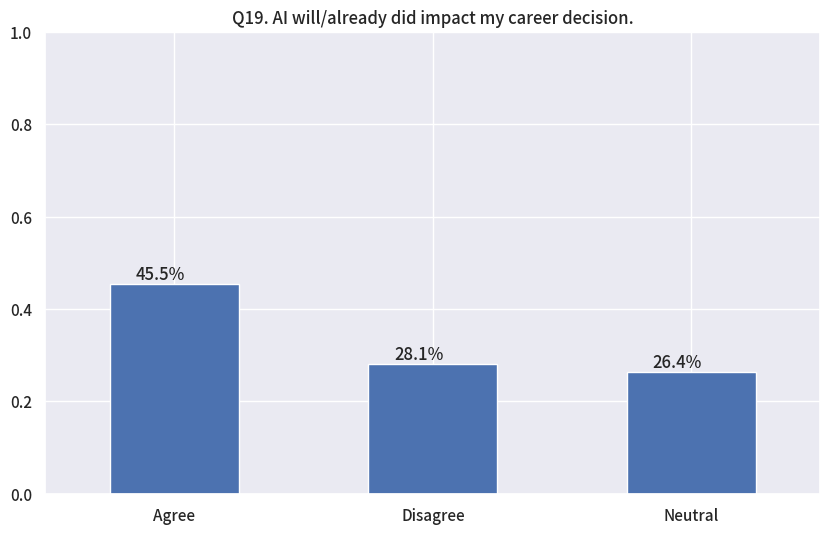

In [718]:
plot_bar_with_percentage(df_aggregated, 'Q19. AI will/already did impact my career decision.')

In [ ]:
check_diff(45.5, 28.1)

No, they can be the same in term of proportion
Difference = 17.4
Room for safety = -0.6000000000000014


No difference, but it is a marginal case

In [ ]:
check_diff(45.5, 26.4)

Ok, they are differnet in term of proportion
Difference = 19.1
Room for safety = 1.1000000000000014


But we can at least conclude that the number of undergraduate argree would be more than those who are neutral

With decisions, come actions--some of us may want to be more informed of AI, but should we receive formal education for it?

# III. Views on Undergraduate AI Education

In [ ]:
AI_edu

['Q11. Learning about AI basics, namely, the above-mentioned course(s), will be beneficial for my career.',
 'Q12. A 2-credits AI basics course should be in my undergraduate curriculum.',
 'Q13. Please rate your likelihood of attending the following optional activities in extracurricular (i.e. outside of curriculum) time: [A 2-hour face-to-face AI basics workshop held by my university]',
 'Q14. Please rate your likelihood of attending the following optional activities in extracurricular (i.e. outside of curriculum) time: [A 7-hour face-to-face multiple workshop series (each workshop is held on different days) on AI basics arranged by my university]']

### Many consider AI eduction neccesary; but it may not the case if it is taught in their undergraduate study

c:\Users\phili\AppData\Local\Programs\Python\Python310\lib\site-packages\plot_likert\plot_likert.py:251: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  df = df.set_axis(new_labels, axis=1, inplace=False)
c:\Users\phili\AppData\Local\Programs\Python\Python310\lib\site-packages\plot_likert\plot_likert.py:251: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  df = df.set_axis(new_labels, axis=1, inplace=False)


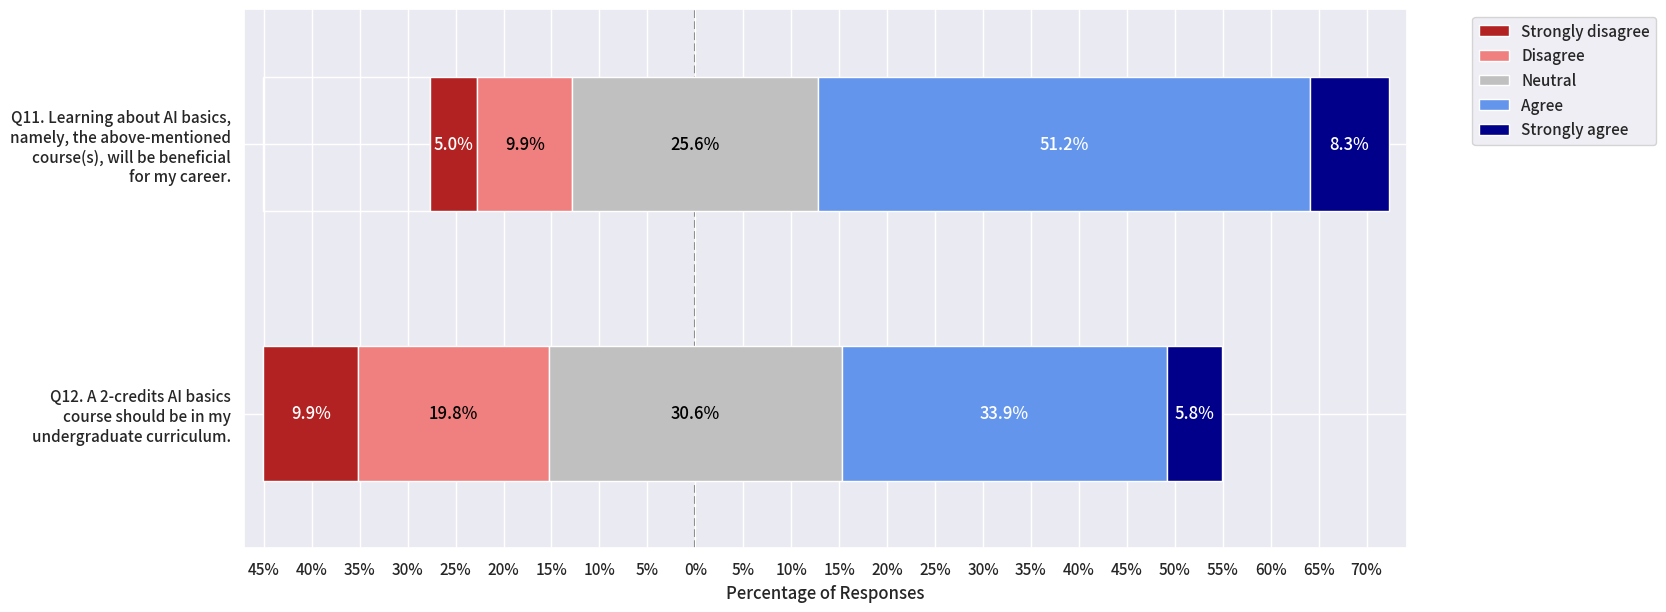

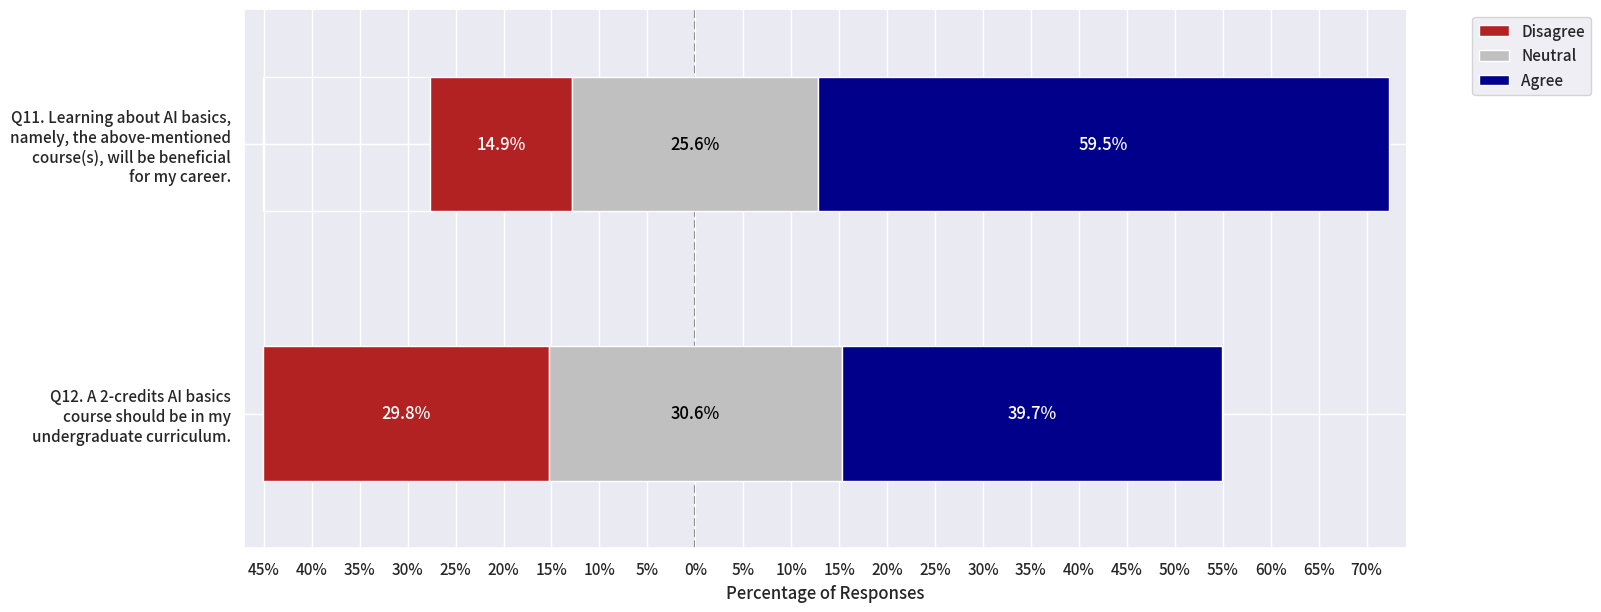

In [ ]:
plot_likert_customized(AI_edu_necessity)
plot_likert_customized_aggregated(AI_edu_necessity)

### Q12: the argreement rate in the whole population is experted to be similar to the disagreement rate (with +-9% margin taken into account)

In [ ]:
# List all unique values in a column "Q2. What year of the undergraduate programme are you in?'" in df
array_question = df['Q2. What year of the undergraduate programme are you in?'].unique()
# Sort array_question by year
array_question.sort()
array_question

array(['1st year', '2nd year', '3rd year', '4th year', '5th year'],
      dtype=object)

In [ ]:
# plot_cross_analysis("Q12. A 2-credits AI basics course should be in my undergraduate curriculum.", "Q2. What year of the undergraduate programme are you in?", ['1st year', '2nd year', '3rd year', '4th year', '5th year'], True)

### Follow-up: why the agreement rate is more than one-third? What group of student?

In [ ]:
AI_edu[2:5]

['Q13. Please rate your likelihood of attending the following optional activities in extracurricular (i.e. outside of curriculum) time: [A 2-hour face-to-face AI basics workshop held by my university]',
 'Q14. Please rate your likelihood of attending the following optional activities in extracurricular (i.e. outside of curriculum) time: [A 7-hour face-to-face multiple workshop series (each workshop is held on different days) on AI basics arranged by my university]']

Students are more likely to join AI education activity diliver in a shorter duration.

c:\Users\phili\AppData\Local\Programs\Python\Python310\lib\site-packages\plot_likert\plot_likert.py:251: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  df = df.set_axis(new_labels, axis=1, inplace=False)


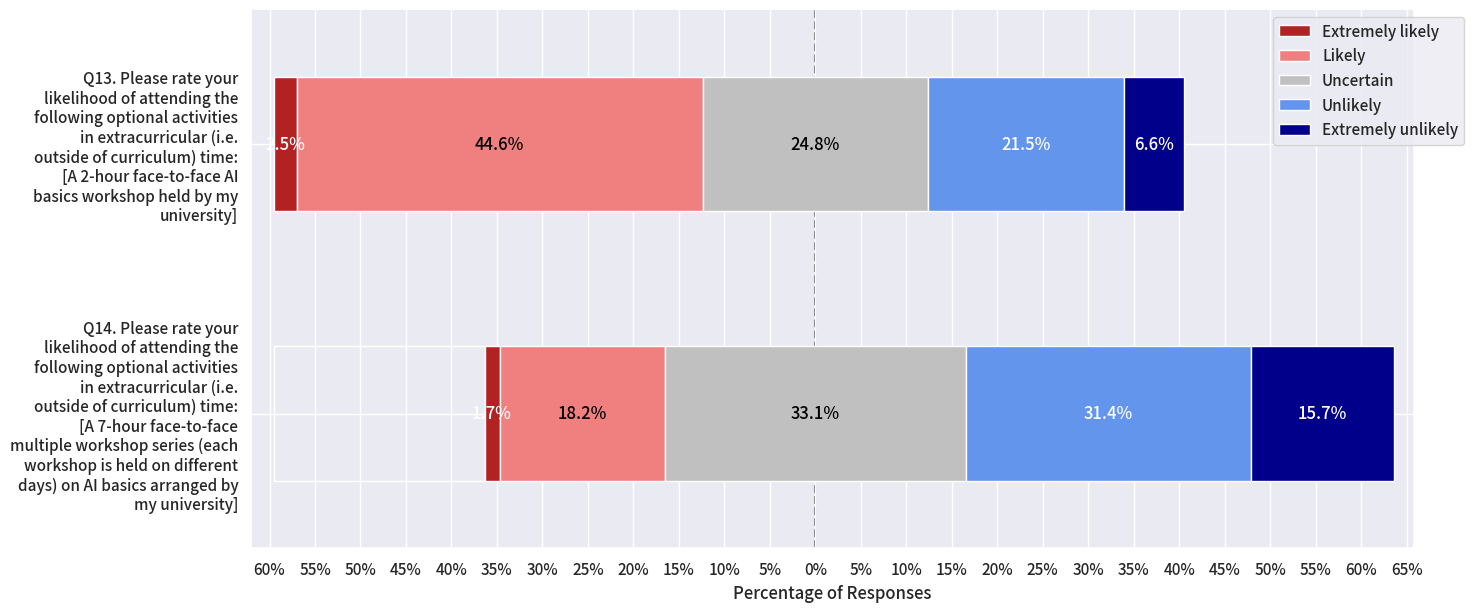

In [ ]:
plot_likert_customized_course(AI_edu[2:5])

# By gender

,Q1. What is your gender?,Q12. A 2-credits AI basics course should be in my undergraduate curriculum.,Percentage
0,Female,Agree,0.358025
1,Female,Disagree,0.333333
2,Female,Neutral,0.308642
3,Male,Agree,0.475000
4,Male,Neutral,0.300000
5,Male,Disagree,0.225000


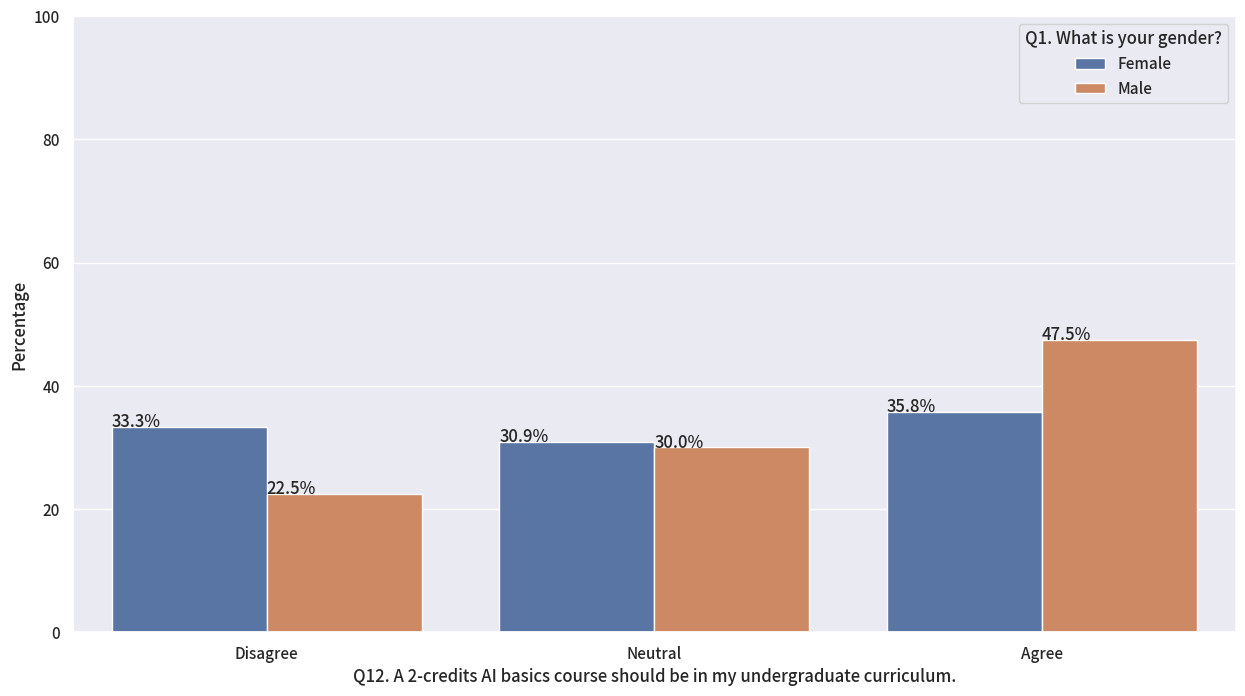

In [ ]:
plot_cross_analysis('Q12. A 2-credits AI basics course should be in my undergraduate curriculum.', 'Q1. What is your gender?', True)

In [ ]:
check_diff(45, 35)

No, they are the same in proportion
Difference = 10
Room for safety = -8


10